## Problem 1:

### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import numpy as np   
import pandas as pd
import os
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import math
from sklearn.metrics import roc_auc_score,plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_excel("D:\Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

## Q 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [7]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [8]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [9]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [10]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [11]:
print("Number of rows: ",df.shape[0], "\n""Number. of columns: ",df.shape[1])

Number of rows:  1525 
Number. of columns:  9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [13]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [14]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [15]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [16]:
df.describe(include='object')

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [19]:
(8/1525)

0.005245901639344262

In [20]:
print("Skewness values"'\n',df.skew())

Skewness values
 age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64


In [21]:
#Changing the name of the few variables who are having dot and replacing it with underscore.
df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge":"political_knowledge"},inplace=True)


## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

### Data Visualization
#### Univariate Analysis

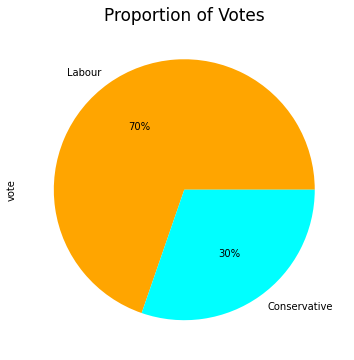

In [22]:
plt.figure(figsize=(6,6))
colors = ['orange','cyan']
df.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes',fontsize=17);

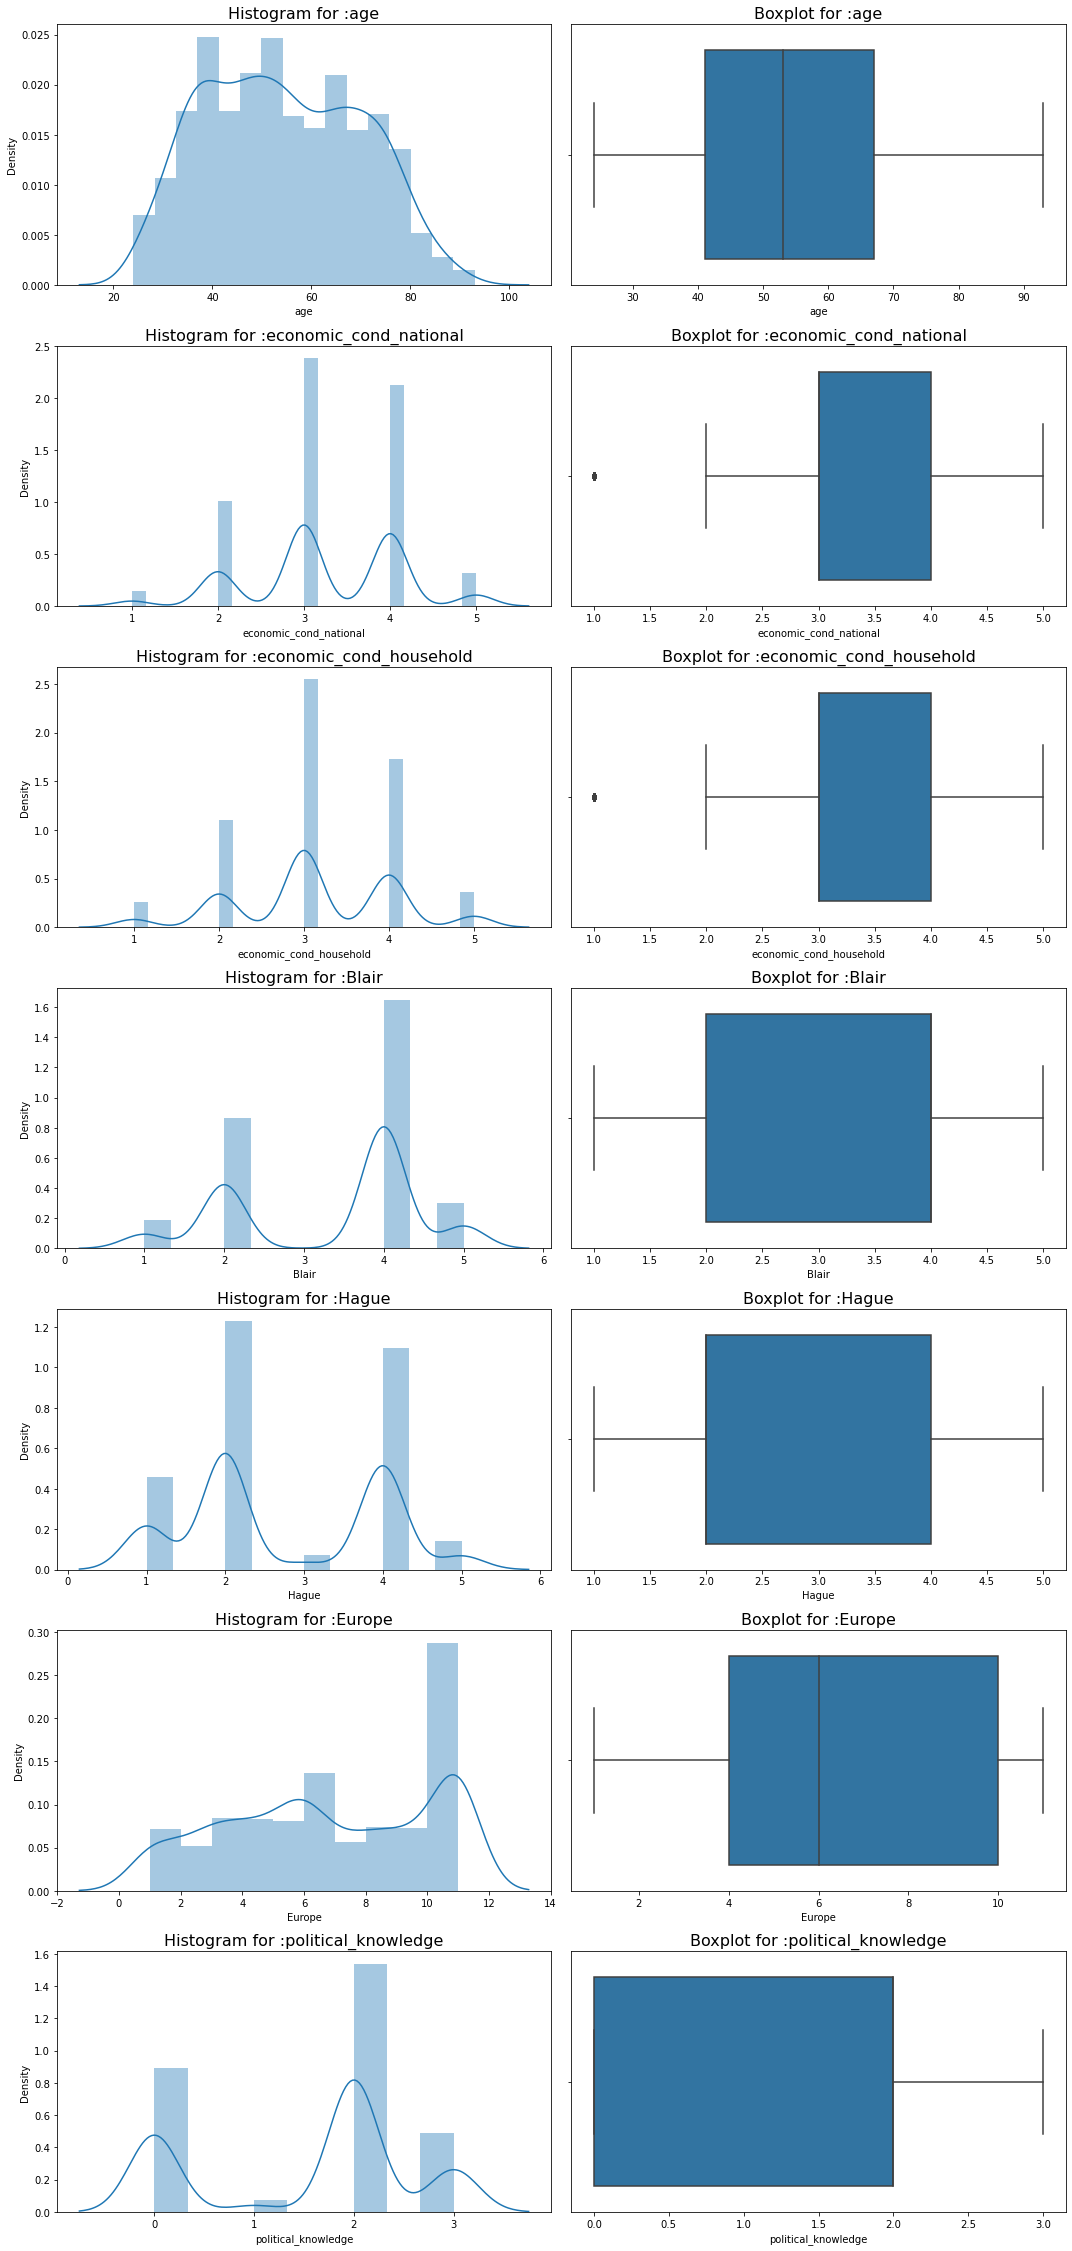

In [23]:
a=1
plt.figure(figsize=(15,80))
for i in df.columns :
    if df[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(df[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(df[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

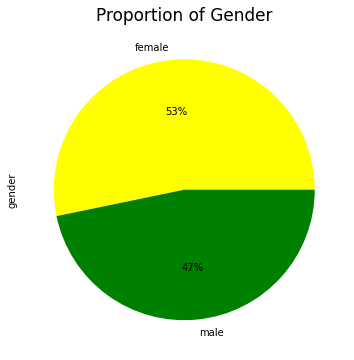

In [23]:
plt.figure(figsize=(6,6))
colors = ['yellow','green']
df.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender',fontsize=17);

<Figure size 864x576 with 0 Axes>

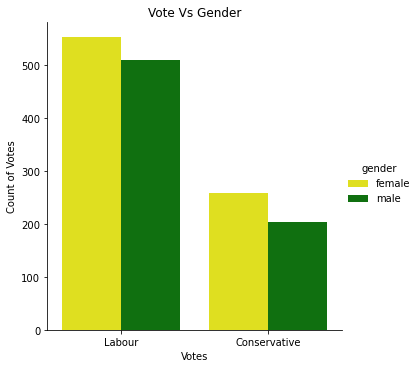

In [24]:
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes');

In [25]:
df[df.vote == "Labour"].age.mean()

53.01411100658514

In [26]:
df[df.vote == "Conservative"].age.mean()

56.87012987012987

In [27]:
df.economic_cond_national.value_counts(normalize=True)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic_cond_national, dtype: float64

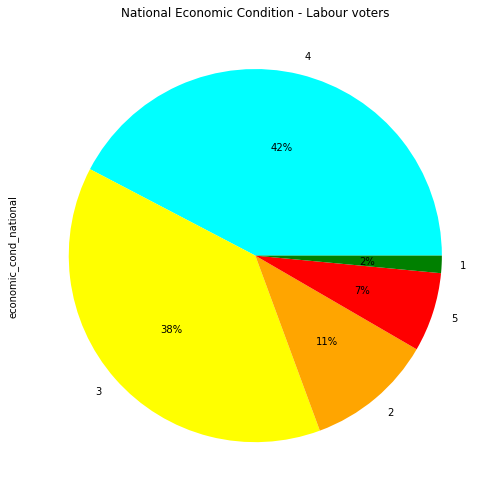

In [28]:
plt.figure(figsize=(9,7))
colors = ['cyan','yellow','orange','red','green']
df[df.vote == "Labour"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Labour voters')
plt.tight_layout()

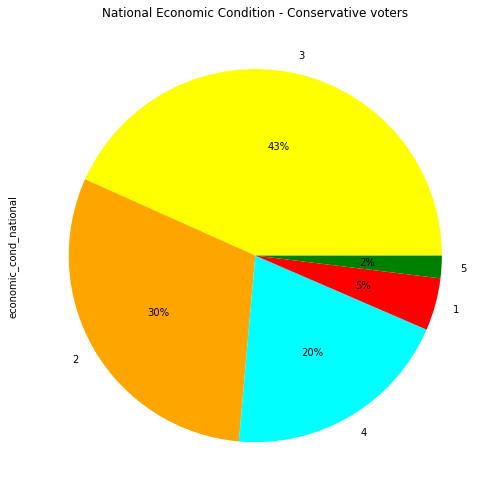

In [29]:
plt.figure(figsize=(8,7))
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Conservative voters')
plt.tight_layout();

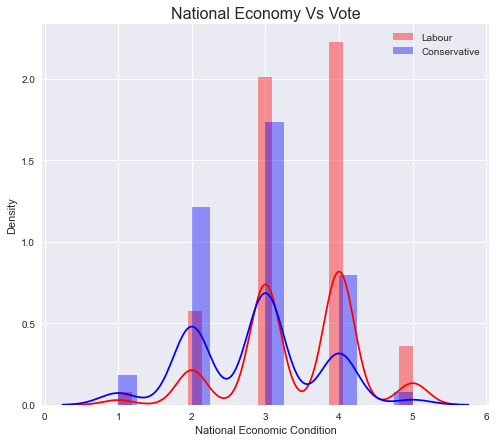

In [30]:
import matplotlib.style
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df[df.vote=='Labour'].economic_cond_national, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_national, label = 'Conservative', color = 'blue')
ax.set_title("National Economy Vs Vote",fontsize=16)
ax.set_xlabel('National Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

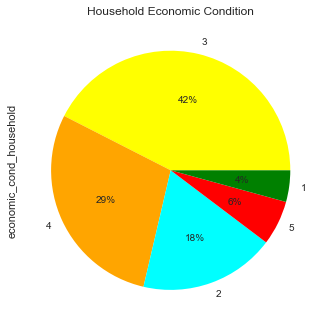

In [31]:
df.economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition')
plt.show()

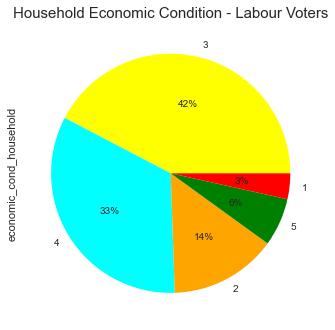

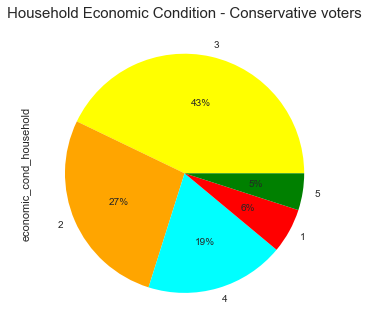

In [32]:
colors = ['yellow','cyan','orange','green', 'red']
plt.figure(0)
df[df.vote == "Labour"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Labour Voters',fontsize=15)
plt.figure(1)
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Conservative voters',fontsize=15)
plt.show()

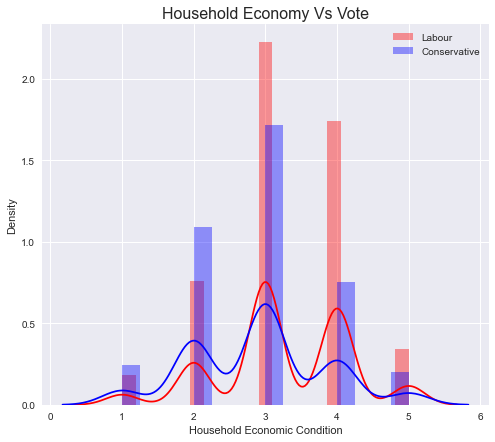

In [33]:
import matplotlib.style
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df[df.vote=='Labour'].economic_cond_household, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_household, label = 'Conservative', color = 'blue')
ax.set_title("Household Economy Vs Vote",fontsize=16)
ax.set_xlabel('Household Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

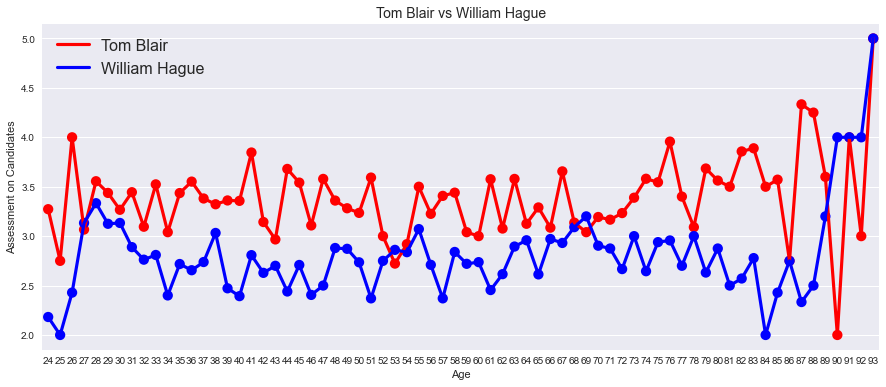

In [34]:
f, ax = plt.subplots(figsize = (15,6))
ax = sns.pointplot(x='age', y="Blair", data=df, ci = None, color = 'red', label = 'Blair')
ax=sns.pointplot(x="age", y="Hague", data=df, ci = None, color = 'blue', label = 'Hague')
ax.set_xlabel('Age')
ax.set_ylabel('Assessment on Candidates')
plt.title("Tom Blair vs William Hague",fontsize=(14))
label=('Tom Blair','William Hague')
ax.legend(label,fontsize=16)
plt.show()

<Figure size 576x396 with 0 Axes>

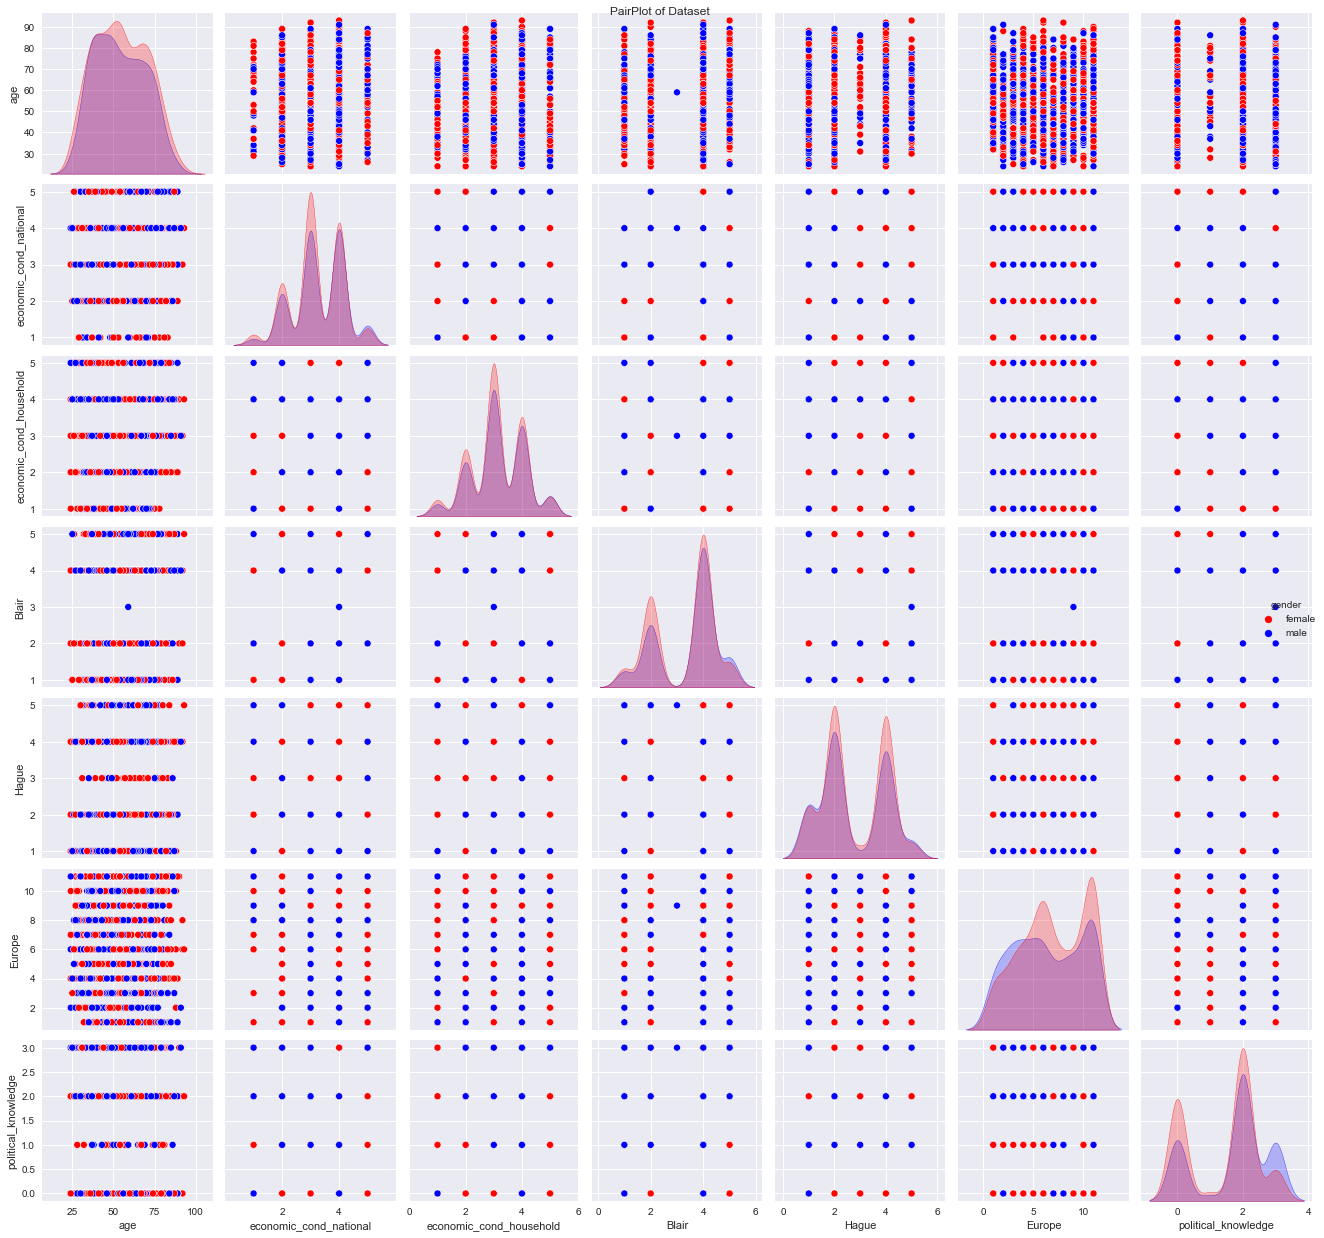

In [35]:
plt.tight_layout()
pairplot = sns.pairplot(df,diag_kind='kde',hue='gender',palette=['red','blue'])
pairplot.fig.suptitle("PairPlot of Dataset")
plt.tight_layout();

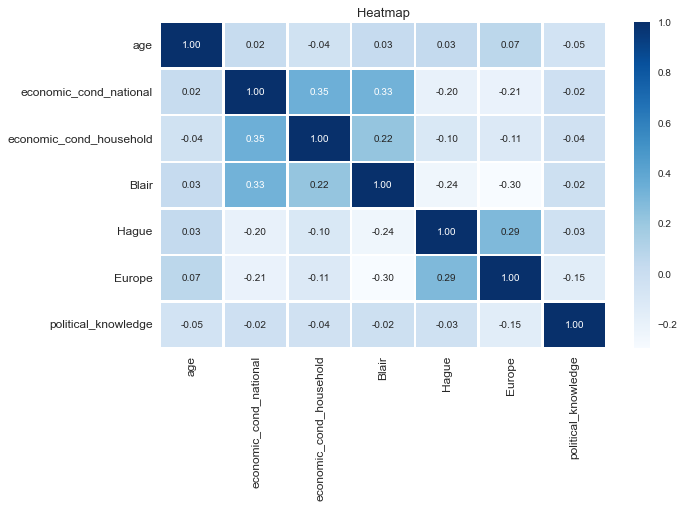

In [36]:
#We can perfom correlation between variables by using heat map
plt.figure(figsize=(10,6))
res=sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="Blues",linewidths=1.5);
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
plt.title("Heatmap",fontsize=13)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12);

### Q 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). 
### The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [37]:
#adding a new column category for the age group. 
category = pd.cut(df.age,
                  bins=[0,35,50,65,80,99],
                  labels=[1,2,3,4,5])
df.insert(6,'Age_Group',category)
df['Age_Group'].value_counts()

2    479
3    416
4    367
1    201
5     62
Name: Age_Group, dtype: int64

In [38]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge']


In [39]:
df = pd.get_dummies(df, columns = {'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge'} ,drop_first=False)


In [40]:
df = pd.get_dummies(df,columns = {'gender'}, drop_first=True)


In [41]:
# Dropping age 
df = df.drop('age', axis = 1)


In [42]:
df.vote.value_counts()
#0 : Conservative and 1 : Labour 

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [43]:
df.vote = df.vote.astype('category')
df.vote = df.vote.cat.codes
df.head()
# Female 0, Male 1

,vote,economic_cond_national_1,economic_cond_national_2,economic_cond_national_3,economic_cond_national_4,economic_cond_national_5,political_knowledge_0,political_knowledge_1,political_knowledge_2,political_knowledge_3,...,Blair_2,Blair_3,Blair_4,Blair_5,economic_cond_household_1,economic_cond_household_2,economic_cond_household_3,economic_cond_household_4,economic_cond_household_5,gender_male
0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   vote                       1525 non-null   int8 
 1   economic_cond_national_1   1525 non-null   uint8
 2   economic_cond_national_2   1525 non-null   uint8
 3   economic_cond_national_3   1525 non-null   uint8
 4   economic_cond_national_4   1525 non-null   uint8
 5   economic_cond_national_5   1525 non-null   uint8
 6   political_knowledge_0      1525 non-null   uint8
 7   political_knowledge_1      1525 non-null   uint8
 8   political_knowledge_2      1525 non-null   uint8
 9   political_knowledge_3      1525 non-null   uint8
 10  Europe_1                   1525 non-null   uint8
 11  Europe_2                   1525 non-null   uint8
 12  Europe_3                   1525 non-null   uint8
 13  Europe_4                   1525 non-null   uint8
 14  Europe_5                

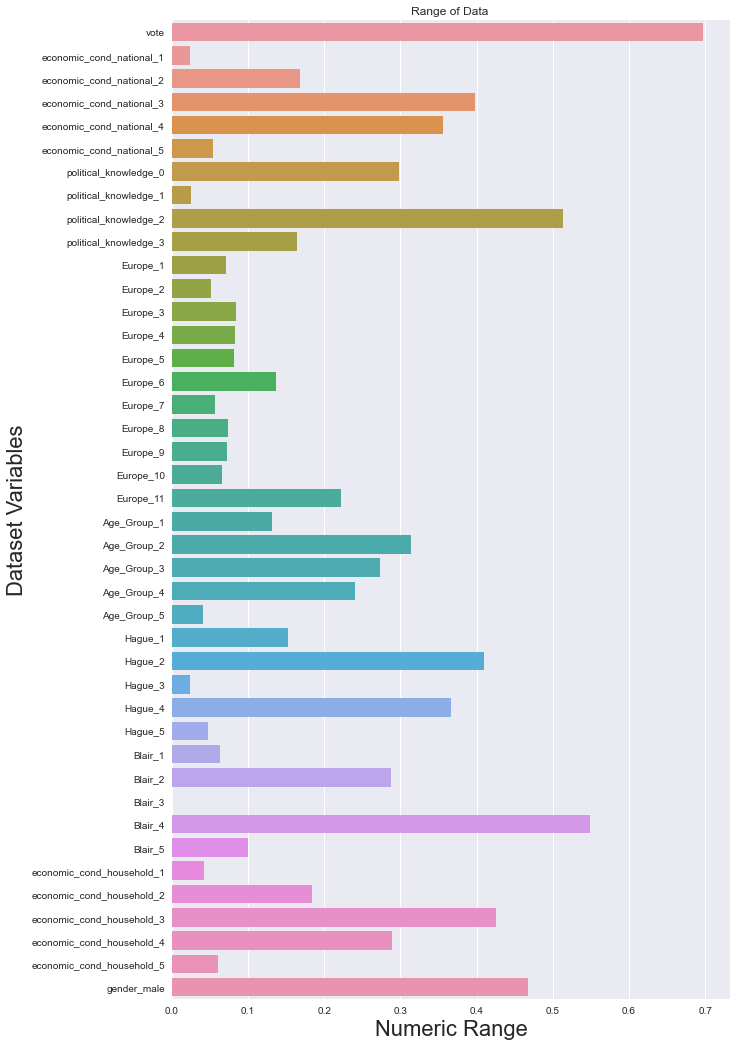

In [45]:
plt.figure(figsize=(10,18))
sns.barplot(data=df,orient='h',ci=False)
plt.ylabel("Dataset Variables",fontsize=22)
plt.xlabel("Numeric Range",fontsize=22)
plt.title("Range of Data ")
plt.show()

In [46]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)
# Copy target into the y dataframe.  
y = df['vote']

In [47]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=1)

In [48]:
#Checking the dimensions of the training and test data
print("Dimensions of the training and test data")
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Observations are',1525)

Dimensions of the training and test data
X_train (1067, 41)
X_test (458, 41)
y_train (1067,)
y_test (458,)
Total Observations are 1525


In [49]:
print("Dimensions of the training and test data")
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)
print("Total number of Observations are",1525)

Dimensions of the training and test data
Number of rows and columns of the training set for the independent variables: (1067, 41)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 41)
Number of rows and columns of the test set for the dependent variable: (458,)
Total number of Observations are 1525


### Q1.4)  Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). 

### Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=1)
logit_model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(max_iter=10000, n_jobs=1, penalty='none', solver='newton-cg',
                   verbose=True)

In [51]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [52]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
238,0.149120,0.850880
212,0.085521,0.914479
437,0.663826,0.336174
190,0.561105,0.438895
105,0.029138,0.970862


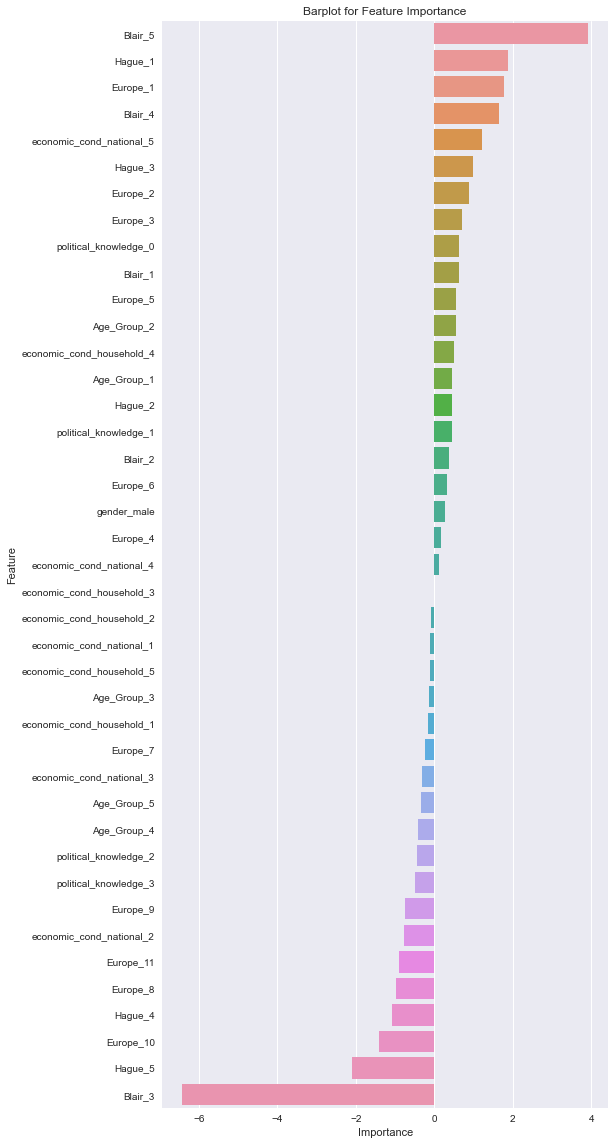

In [54]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,20))
sns.barplot(y='Feature', x='Importance', data=feature_rank)
plt.title("Barplot for Feature Importance");

In [ ]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [ ]:
def performance_matrices_maj(model, X_data, y_data, y_predicted): #will be used for final comparison
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [53]:
logit_train_met1,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.84
logit_train_precision  0.77
logit_train_recall  0.7
logit_train_f1  0.73


In [54]:
print(    "Classification report of Train Data")
logit_train_met1

Classification report of Train Data


,precision,recall,f1-score,support
0,0.770000,0.695783,0.731013,332.000000
1,0.868318,0.906122,0.886818,735.000000
accuracy,0.840675,0.840675,0.840675,0.840675
macro avg,0.819159,0.800953,0.808915,1067.000000
weighted avg,0.837726,0.840675,0.838338,1067.000000


In [55]:
logit_test_met1,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
logit_test_met_maj1,logit_test_accu_maj, logit_test_precision_maj, logit_test_recall_maj, logit_test_f1_maj = performance_matrices_maj(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.68
logit_test_recall  0.7
logit_test_f1  0.69


In [56]:
print("Classification report of Test Data")
logit_test_met1

Classification report of Test Data


,precision,recall,f1-score,support
0,0.684211,0.700000,0.692015,130.000000
1,0.880000,0.871951,0.875957,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.782105,0.785976,0.783986,458.000000
weighted avg,0.824427,0.823144,0.823747,458.000000


              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



<Figure size 720x432 with 0 Axes>

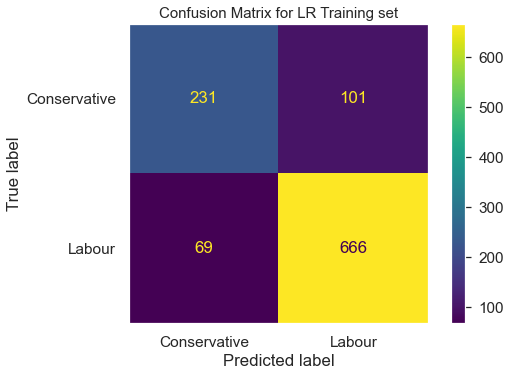

In [57]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for LR Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       130
           1       0.88      0.87      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.78       458
weighted avg       0.82      0.82      0.82       458
 



<Figure size 720x432 with 0 Axes>

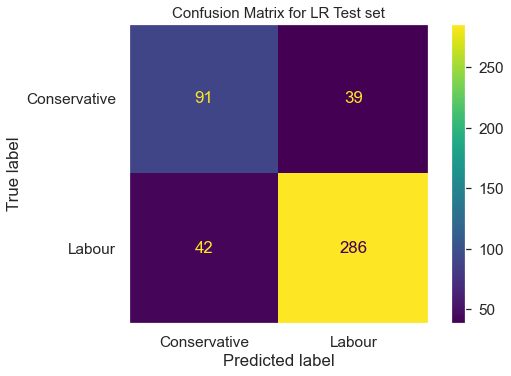

In [58]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for LR Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

AUC for Training data = 0.9044709450045079
AUC for Test data = 0.8843691369606004


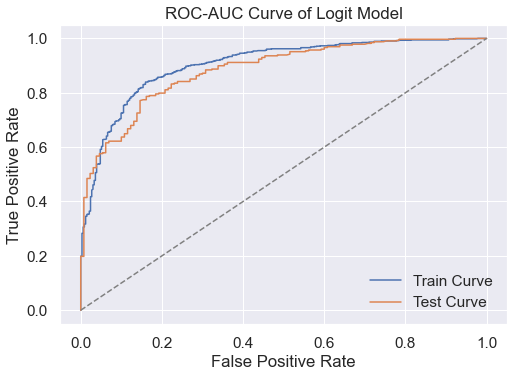

In [59]:
LR_train_predict_prob = logit_model.predict_proba(X_train)
LR_test_predict_prob = logit_model.predict_proba(X_test)
LR_pred_train_prob = logit_model.predict_proba(X_train)
LR_pred_test_prob = logit_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(logit_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(logit_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of Logit Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

In [60]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

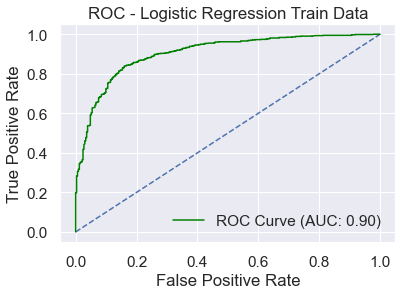

logit_train_auc 0.9044709450045079


In [61]:
logit_train_auc1, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')

print('logit_train_auc', logit_train_auc1)

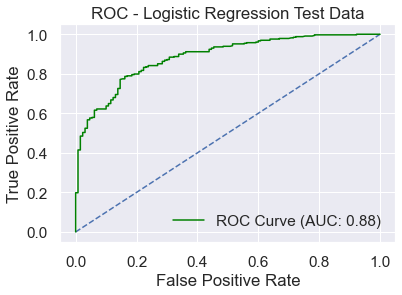

logit_test_auc 0.8843691369606004


In [62]:
logit_test_auc1, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc1)

### LDA Model

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [64]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [65]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.854732,0.145268
1,0.801276,0.198724
2,0.578918,0.421082
3,0.533780,0.466220
4,0.210744,0.789256
5,0.847049,0.152951
6,0.005956,0.994044
7,0.023630,0.976370
8,0.163044,0.836956
9,0.006272,0.993728


In [66]:
LDA_train_met1,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
LDA_train_met_maj1,LDA_train_accu_maj,LDA_train_precision_maj,LDA_train_recall_maj,LDA_train_f1_maj = performance_matrices_maj(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.85
LDA_train_precision  0.78
LDA_train_recall  0.71
LDA_train_f1  0.74


In [67]:
print("Classification report of Train Data")
LDA_train_met1

Classification report of Train Data


,precision,recall,f1-score,support
0,0.778146,0.707831,0.741325,332.000000
1,0.873203,0.908844,0.890667,735.000000
accuracy,0.846298,0.846298,0.846298,0.846298
macro avg,0.825674,0.808337,0.815996,1067.000000
weighted avg,0.843625,0.846298,0.844199,1067.000000


In [362]:
LDA_test_met1,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
LDA_test_met_maj1,LDA_test_accu_maj,LDA_test_precision_maj,LDA_test_recall_maj,LDA_test_f1_maj = performance_matrices_maj(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.81
LDA_test_precision  0.66
LDA_test_recall  0.68
LDA_test_f1  0.67


In [68]:
print("Classification report of Test Data")
LDA_test_met1

Classification report of Test Data


NameError: name 'LDA_test_met1' is not defined

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.84      1067
 



<Figure size 720x432 with 0 Axes>

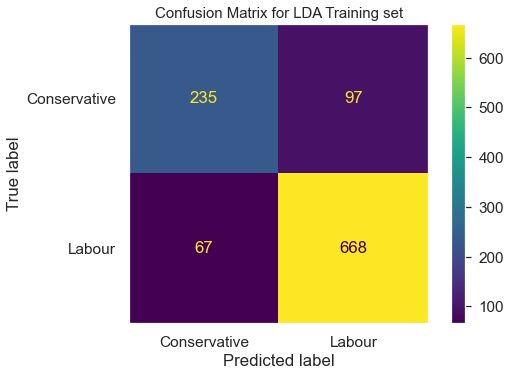

In [72]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for LDA Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       130
           1       0.87      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458
 



<Figure size 720x432 with 0 Axes>

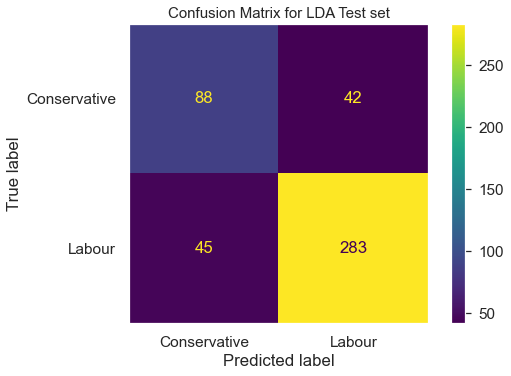

In [73]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for LDA Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

AUC for Training data = 0.8983402999754119
AUC for Test data = 0.8824695121951219


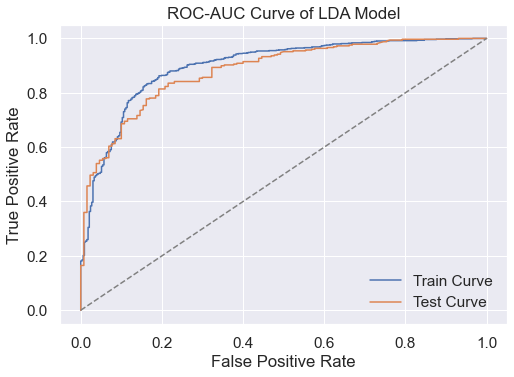

In [74]:
LR_train_predict_prob = LDA_model.predict_proba(X_train)
LR_test_predict_prob = LDA_model.predict_proba(X_test)
LR_pred_train_prob = LDA_model.predict_proba(X_train)
LR_pred_test_prob = LDA_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(LDA_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(LDA_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of LDA Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

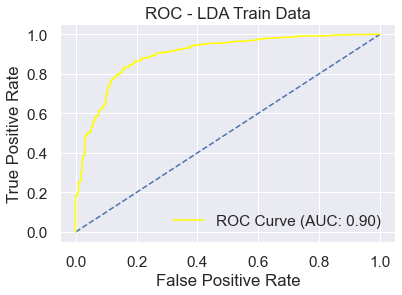

LDA_train_auc 0.8983402999754119


In [75]:
LDA_train_auc1, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(LDA_model, X_train, y_train, 'yellow', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc1)

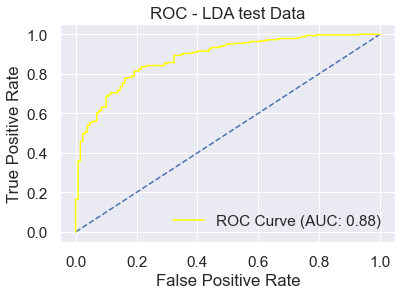

LDA_test_auc 0.8824695121951219


In [76]:
LDA_test_auc1, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'yellow', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc1)

### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). 
### Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### KNN  Model

In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [79]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [80]:
KNN_train_met1,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train, y_train, ytrain_predict)
KNN_train_met_maj1,KNN_train_accu_maj,KNN_train_precision_maj,KNN_train_recall_maj,KNN_train_f1_maj = performance_matrices_maj(KNN_model, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.87
KNN_train_precision  0.81
KNN_train_recall  0.75
KNN_train_f1  0.78


In [81]:
print("Classification report of Train Data")
KNN_train_met1

Classification report of Train Data


,precision,recall,f1-score,support
0,0.813115,0.746988,0.778650,332.000000
1,0.889764,0.922449,0.905812,735.000000
accuracy,0.867854,0.867854,0.867854,0.867854
macro avg,0.851439,0.834718,0.842231,1067.000000
weighted avg,0.865914,0.867854,0.866245,1067.000000


In [82]:
KNN_test_met1,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
KNN_test_met_maj1,KNN_test_accu_maj,KNN_test_precision_maj,KNN_test_recall_maj,KNN_test_f1_maj = performance_matrices_maj(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.79
KNN_test_precision  0.64
KNN_test_recall  0.59
KNN_test_f1  0.61


In [83]:
print("Classification report of Test Data")
KNN_test_met1

Classification report of Test Data


,precision,recall,f1-score,support
0,0.636364,0.592308,0.613546,130.00000
1,0.842730,0.865854,0.854135,328.00000
accuracy,0.788210,0.788210,0.788210,0.78821
macro avg,0.739547,0.729081,0.733841,458.00000
weighted avg,0.784154,0.788210,0.785846,458.00000


              precision    recall  f1-score   support

           0       0.81      0.75      0.78       332
           1       0.89      0.92      0.91       735

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.87      0.87      0.87      1067
 



<Figure size 720x432 with 0 Axes>

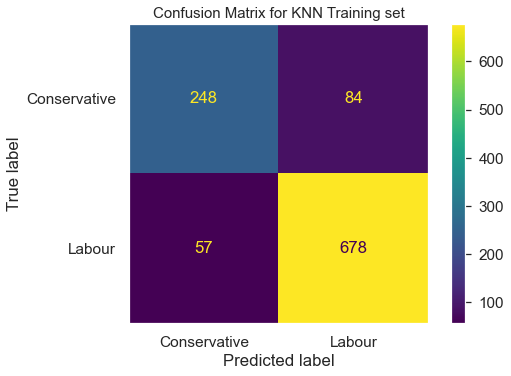

In [84]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for KNN Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       130
           1       0.84      0.87      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.73      0.73       458
weighted avg       0.78      0.79      0.79       458
 



<Figure size 720x432 with 0 Axes>

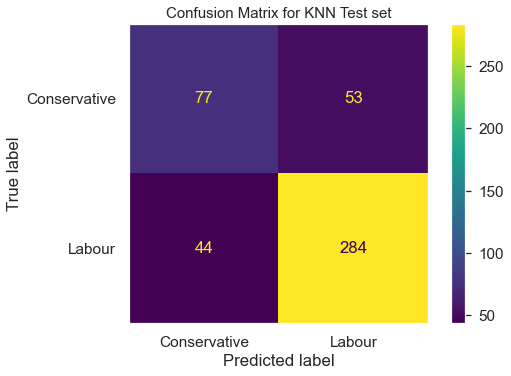

In [85]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for KNN Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

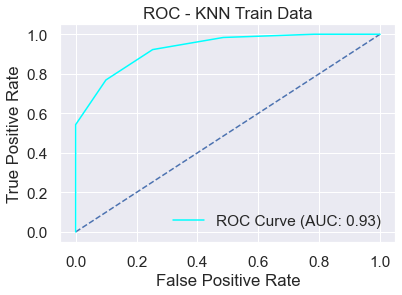

KNN_train_auc 0.9287435456110154


In [86]:
KNN_train_auc1, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc1)

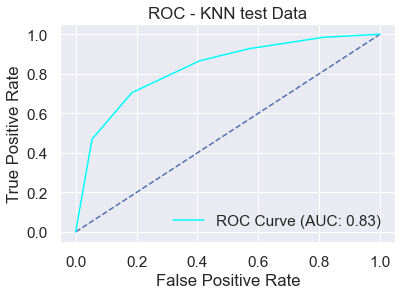

KNN_test_auc 0.8277908067542215


In [87]:
KNN_test_auc1, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc1)

AUC for Training data = 0.9287435456110154
AUC for Test data = 0.8277908067542215


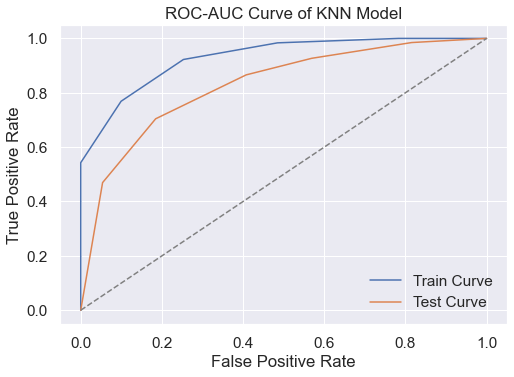

In [88]:
LR_train_predict_prob = KNN_model.predict_proba(X_train)
LR_test_predict_prob = KNN_model.predict_proba(X_test)
LR_pred_train_prob = KNN_model.predict_proba(X_train)
LR_pred_test_prob = KNN_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of KNN Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Naive Bayes Model

In [89]:
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [90]:
MNB_model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [91]:
ytrain_predict = MNB_model.predict(X_train)
ytest_predict = MNB_model.predict(X_test)

In [92]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
63,0.184190,0.815810
52,0.229228,0.770772
377,0.940002,0.059998
90,0.717308,0.282692
240,0.100106,0.899894
324,0.027389,0.972611
380,0.079517,0.920483
145,0.017188,0.982812
72,0.106684,0.893316
385,0.037186,0.962814


In [93]:
MNB_train_met1,MNB_train_accu,MNB_train_precision,MNB_train_recall,MNB_train_f1 = performance_matrices(MNB_model, X_train, y_train, ytrain_predict)
MNB_train_met_maj1,MNB_train_accu_maj,MNB_train_precision_maj,MNB_train_recall_maj,MNB_train_f1_maj = performance_matrices_maj(MNB_model, X_train, y_train, ytrain_predict)
print ('MNB_train_accu ',MNB_train_accu)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_accu  0.84
MNB_train_precision  0.74
MNB_train_recall  0.73
MNB_train_f1  0.73


In [94]:
print("Classification report of Train Data")
MNB_train_met1

Classification report of Train Data


,precision,recall,f1-score,support
0,0.739264,0.725904,0.732523,332.000000
1,0.877193,0.884354,0.880759,735.000000
accuracy,0.835052,0.835052,0.835052,0.835052
macro avg,0.808228,0.805129,0.806641,1067.000000
weighted avg,0.834276,0.835052,0.834635,1067.000000


In [95]:
MNB_test_met1,MNB_test_accu,MNB_test_precision,MNB_test_recall,MNB_test_f1 = performance_matrices(MNB_model, X_test, y_test, ytest_predict)
MNB_test_met_maj1,MNB_test_accu_maj,MNB_test_precision_maj,MNB_test_recall_maj,MNB_test_f1_maj = performance_matrices_maj(MNB_model, X_test, y_test, ytest_predict)
print ('MNB_test_accu ',MNB_test_accu)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_accu  0.83
MNB_test_precision  0.68
MNB_test_recall  0.74
MNB_test_f1  0.71


In [96]:
print("Classification report of Test Data")
MNB_test_met1

Classification report of Test Data


,precision,recall,f1-score,support
0,0.680851,0.738462,0.708487,130.000000
1,0.892744,0.862805,0.877519,328.000000
accuracy,0.827511,0.827511,0.827511,0.827511
macro avg,0.786798,0.800633,0.793003,458.000000
weighted avg,0.832600,0.827511,0.829541,458.000000


              precision    recall  f1-score   support

           0       0.74      0.73      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.83      0.84      0.83      1067
 



<Figure size 720x432 with 0 Axes>

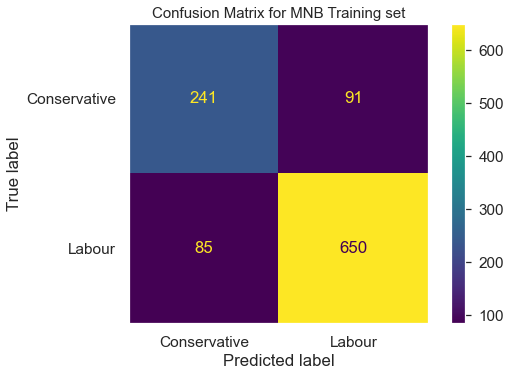

In [97]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(MNB_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for MNB Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       130
           1       0.89      0.86      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458
 



<Figure size 720x432 with 0 Axes>

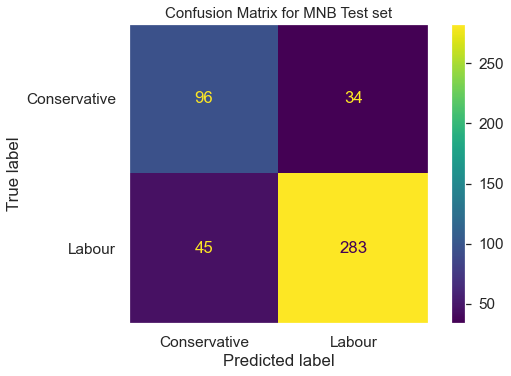

In [98]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(MNB_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for MNB Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

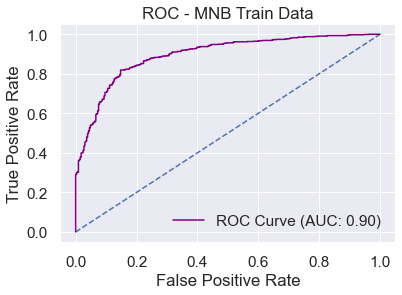

MNB_train_auc 0.8953733300549136


In [99]:
MNB_train_auc1, MNB_train_fpr, MNB_train_tpr = draw_auc_roc(MNB_model, X_train, y_train, 'purple', 'ROC - MNB Train Data')
print('MNB_train_auc', MNB_train_auc1)

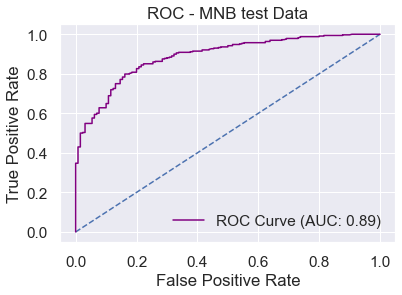

MNB_test_auc 0.8885201688555346


In [100]:
MNB_test_auc1, MNB_test_fpr, MNB_test_tpr = draw_auc_roc(MNB_model, X_test, y_test, 'purple', 'ROC - MNB test Data')
print('MNB_test_auc', MNB_test_auc1)

AUC for Training data = 0.8953733300549136
AUC for Test data = 0.8885201688555346


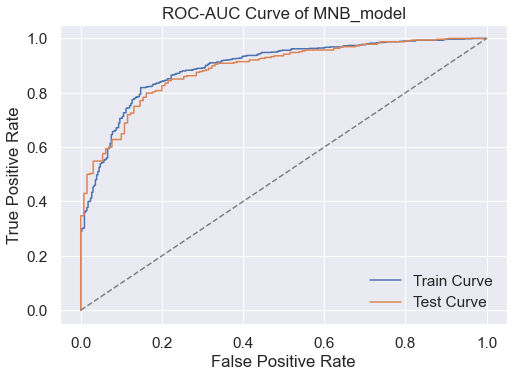

In [101]:
LR_train_predict_prob = MNB_model.predict_proba(X_train)
LR_test_predict_prob = MNB_model.predict_proba(X_test)
LR_pred_train_prob = MNB_model.predict_proba(X_train)
LR_pred_test_prob = MNB_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(MNB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(MNB_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of MNB_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### SVM MODEL

In [105]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [106]:
ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

In [107]:
SVM_train_met1,SVM_train_accu,SVM_train_precision,SVM_train_recall,SVM_train_f1 = performance_matrices(SVM_model, X_train, y_train, ytrain_predict)
SVM_train_met_maj1,SVM_train_accu_maj,SVM_train_precision_maj,SVM_train_recall_maj,SVM_train_f1_maj = performance_matrices_maj(SVM_model, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_accu  0.9
SVM_train_precision  0.88
SVM_train_recall  0.78
SVM_train_f1  0.83


In [108]:
print("Classification report of Train Data")
SVM_train_met1


Classification report of Train Data


,precision,recall,f1-score,support
0,0.877966,0.780120,0.826156,332.000000
1,0.905440,0.951020,0.927671,735.000000
accuracy,0.897844,0.897844,0.897844,0.897844
macro avg,0.891703,0.865570,0.876914,1067.000000
weighted avg,0.896892,0.897844,0.896084,1067.000000


In [109]:
SVM_test_met1,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
SVM_test_met_maj1,SVM_test_accu_maj,SVM_test_precision_maj,SVM_test_recall_maj,SVM_test_f1_maj = performance_matrices_maj(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.81
SVM_test_precision  0.7
SVM_test_recall  0.62
SVM_test_f1  0.65


In [110]:
print("Classification report of Test Data")
SVM_test_met1

Classification report of Test Data


,precision,recall,f1-score,support
0,0.695652,0.615385,0.653061,130.00000
1,0.854227,0.893293,0.873323,328.00000
accuracy,0.814410,0.814410,0.814410,0.81441
macro avg,0.774940,0.754339,0.763192,458.00000
weighted avg,0.809217,0.814410,0.810804,458.00000


              precision    recall  f1-score   support

           0       0.88      0.78      0.83       332
           1       0.91      0.95      0.93       735

    accuracy                           0.90      1067
   macro avg       0.89      0.87      0.88      1067
weighted avg       0.90      0.90      0.90      1067
 



<Figure size 720x432 with 0 Axes>

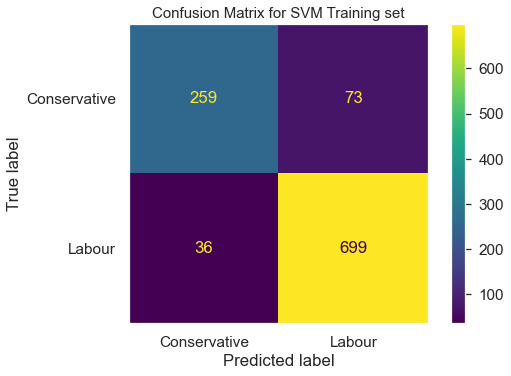

In [111]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for SVM Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.70      0.62      0.65       130
           1       0.85      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458
 



<Figure size 720x432 with 0 Axes>

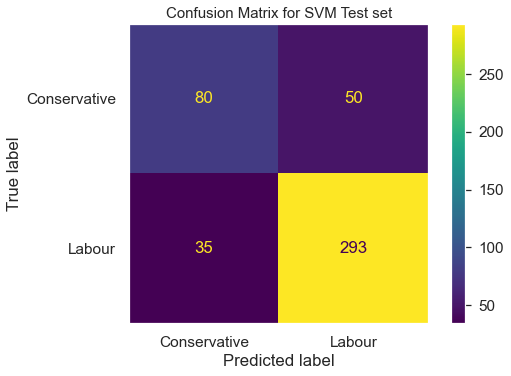

In [112]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for SVM Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

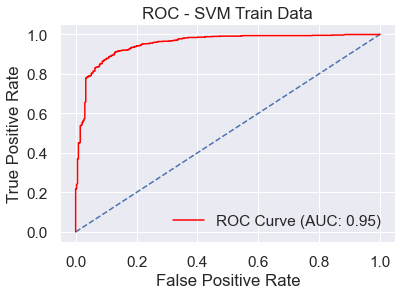

SVM_train_auc 0.9512601426112614


In [540]:
SVM_train_auc1, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_model, X_train, y_train, 'red', 'ROC - SVM Train Data')
print('SVM_train_auc', SVM_train_auc1)

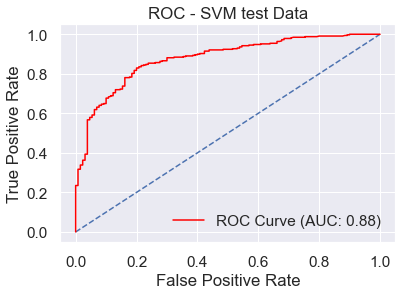

SVM_test_auc 0.8772865853658537


In [541]:
SVM_test_auc1, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model, X_test, y_test, 'red', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc1)

AUC for Training data = 0.9512601426112614
AUC for Test data = 0.8772865853658537


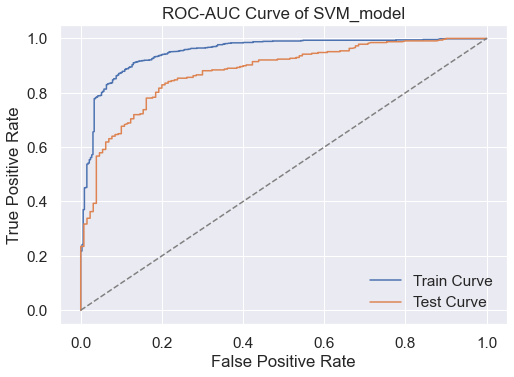

In [396]:
LR_train_predict_prob = SVM_model.predict_proba(X_train)
LR_test_predict_prob = SVM_model.predict_proba(X_test)
LR_pred_train_prob = SVM_model.predict_proba(X_train)
LR_pred_test_prob = SVM_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(SVM_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(SVM_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of SVM_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Q 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [114]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [115]:
df.vote.value_counts()

1    1063
0     462
Name: vote, dtype: int64

### Model Tuning

In [116]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [117]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1067, 41)
After SMOTE:  (1470, 41)


### Linear Regression with SMOTE

In [118]:
logit_res_model = LogisticRegression()
logit_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [119]:
ytrain_predict = logit_res_model.predict(X_train_res)
ytest_predict = logit_res_model.predict(X_test)

In [120]:
logit_test_met2,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.82
logit_res_test_precision  0.69
logit_res_test_recall  0.68
logit_res_test_f1  0.69


In [121]:
logit_test_met2

,precision,recall,f1-score,support
0,0.689922,0.684615,0.687259,130.000000
1,0.875380,0.878049,0.876712,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.782651,0.781332,0.781986,458.000000
weighted avg,0.822739,0.823144,0.822937,458.000000


In [122]:
logit_test_met1

,precision,recall,f1-score,support
0,0.684211,0.700000,0.692015,130.000000
1,0.880000,0.871951,0.875957,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.782105,0.785976,0.783986,458.000000
weighted avg,0.824427,0.823144,0.823747,458.000000


### LDA with SMOTE

In [123]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [124]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [125]:
LDA_test_met2,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.72
LDA_res_test_precision  0.0
LDA_res_test_recall  0.0
LDA_res_test_f1  0.0


In [126]:
LDA_test_met2

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,130.000000
1,0.716157,1.000000,0.834606,328.000000
accuracy,0.716157,0.716157,0.716157,0.716157
macro avg,0.358079,0.500000,0.417303,458.000000
weighted avg,0.512881,0.716157,0.597709,458.000000


In [24]:
LDA_test_met1

NameError: name 'LDA_test_met1' is not defined

### KNN with SMOTE

In [128]:
KNN_res_model=KNeighborsClassifier()
KNN_res_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [129]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [130]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.79
KNN_res_test_precision  0.65
KNN_res_test_recall  0.61
KNN_res_test_f1  0.63


In [131]:
KNN_test_met2

,precision,recall,f1-score,support
0,0.647541,0.607692,0.626984,130.00000
1,0.848214,0.868902,0.858434,328.00000
accuracy,0.794760,0.794760,0.794760,0.79476
macro avg,0.747878,0.738297,0.742709,458.00000
weighted avg,0.791255,0.794760,0.792738,458.00000


# SVM with SMOTE

In [132]:
SVM_res_model= svm.SVC(probability=True,random_state=1)
SVM_res_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [133]:
SVM_res_model= svm.SVC(probability=True,random_state=1)
SVM_res_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [134]:
ytrain_predict = SVM_res_model.predict(X_train_res)
ytest_predict = SVM_res_model.predict(X_test)

In [135]:
SVM_test_met2,SVM_res_test_accu,SVM_res_test_precision,SVM_res_test_recall,SVM_res_test_f1 = performance_matrices(SVM_res_model, X_test, y_test, ytest_predict)
print ('SVM_res_test_accu ',SVM_res_test_accu)
print ('SVM_res_test_precision ',SVM_res_test_precision)
print ('SVM_res_test_recall ',SVM_res_test_recall)
print ('SVM_res_test_f1 ',SVM_res_test_f1)

SVM_res_test_accu  0.72
SVM_res_test_precision  0.0
SVM_res_test_recall  0.0
SVM_res_test_f1  0.0


In [136]:
SVM_test_met2

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,130.000000
1,0.716157,1.000000,0.834606,328.000000
accuracy,0.716157,0.716157,0.716157,0.716157
macro avg,0.358079,0.500000,0.417303,458.000000
weighted avg,0.512881,0.716157,0.597709,458.000000


In [137]:
SVM_test_met1

,precision,recall,f1-score,support
0,0.695652,0.615385,0.653061,130.00000
1,0.854227,0.893293,0.873323,328.00000
accuracy,0.814410,0.814410,0.814410,0.81441
macro avg,0.774940,0.754339,0.763192,458.00000
weighted avg,0.809217,0.814410,0.810804,458.00000


### MNB with SMOTE

In [138]:
MNB_res_model = MultinomialNB()
MNB_res_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [139]:
ytrain_predict = MNB_res_model.predict(X_train_res)
ytest_predict = MNB_res_model.predict(X_test)

In [140]:
MNB_test_met2,MNB_res_test_accu,MNB_res_test_precision,MNB_res_test_recall,MNB_res_test_f1 = performance_matrices(MNB_res_model, X_test, y_test, ytest_predict)
print ('MNB_res_test_accu ',MNB_res_test_accu)
print ('MNB_res_test_precision ',MNB_res_test_precision)
print ('MNB_res_test_recall ',MNB_res_test_recall)
print ('MNB_res_test_f1 ',MNB_res_test_f1)

MNB_res_test_accu  0.77
MNB_res_test_precision  0.62
MNB_res_test_recall  0.52
MNB_res_test_f1  0.57


In [141]:
MNB_test_met2

,precision,recall,f1-score,support
0,0.618182,0.523077,0.566667,130.000000
1,0.821839,0.871951,0.846154,328.000000
accuracy,0.772926,0.772926,0.772926,0.772926
macro avg,0.720010,0.697514,0.706410,458.000000
weighted avg,0.764032,0.772926,0.766823,458.000000


In [142]:
MNB_test_met1

,precision,recall,f1-score,support
0,0.680851,0.738462,0.708487,130.000000
1,0.892744,0.862805,0.877519,328.000000
accuracy,0.827511,0.827511,0.827511,0.827511
macro avg,0.786798,0.800633,0.793003,458.000000
weighted avg,0.832600,0.827511,0.829541,458.000000


### Hyperparameter tuning using GridsearchCV
#### Logistic Regression with GridSearchCV

In [143]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:2, 1:1})
clf = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model3 = GridSearchCV(clf, param_grid = grid_values,cv = 10,n_jobs=-1)
#logit_model3 = LogisticRegression(C = 1.438449888287663, penalty = 'l2', solver = 'newton-cg', class_weight = class_weight)
logit_model3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [144]:
print ("Best Parametres from",logit_model3.best_estimator_)

Best Parametres from LogisticRegression(C=6.158482110660261, class_weight={0: 2, 1: 1},
                   penalty='none', solver='sag')


In [146]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model3.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [147]:
ytrain_predict = logit_model3.predict(X_train)
ytest_predict = logit_model3.predict(X_test)

In [148]:
#logit_train_met3,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model3, X_train_res, y_train_res, ytrain_predict)
logit_train_met3,logit_train_accu3, logit_train_precision3, logit_train_recall3, logit_train_f13 = performance_matrices(logit_model3, X_train, y_train, ytrain_predict)
logit_train_met_maj3,logit_train_accu_maj3, logit_train_precision_maj3, logit_train_recall_maj3, logit_train_f1_maj3 = performance_matrices_maj(logit_model3, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu3)
print ('logit_train_precision ',logit_train_precision3)
print ('logit_train_recall ',logit_train_recall3)
print ('logit_train_f1 ',logit_train_f13)

logit_train_accu  0.84
logit_train_precision  0.7
logit_train_recall  0.84
logit_train_f1  0.76


In [149]:
logit_train_met3

,precision,recall,f1-score,support
0,0.698492,0.837349,0.761644,332.000000
1,0.919283,0.836735,0.876068,735.000000
accuracy,0.836926,0.836926,0.836926,0.836926
macro avg,0.808887,0.837042,0.818856,1067.000000
weighted avg,0.850583,0.836926,0.840465,1067.000000


In [150]:
logit_train_met1 #to compare with 1st iteration

,precision,recall,f1-score,support
0,0.770000,0.695783,0.731013,332.000000
1,0.868318,0.906122,0.886818,735.000000
accuracy,0.840675,0.840675,0.840675,0.840675
macro avg,0.819159,0.800953,0.808915,1067.000000
weighted avg,0.837726,0.840675,0.838338,1067.000000


In [151]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.68
logit_test_recall  0.7
logit_test_f1  0.69


In [434]:
logit_test_met3

,precision,recall,f1-score,support
0,0.623529,0.815385,0.706667,130.00000
1,0.916667,0.804878,0.857143,328.00000
accuracy,0.807860,0.807860,0.807860,0.80786
macro avg,0.770098,0.810131,0.781905,458.00000
weighted avg,0.833462,0.807860,0.814431,458.00000


In [435]:
logit_test_met1

,precision,recall,f1-score,support
0,0.684211,0.700000,0.692015,130.000000
1,0.880000,0.871951,0.875957,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.782105,0.785976,0.783986,458.000000
weighted avg,0.824427,0.823144,0.823747,458.000000


              precision    recall  f1-score   support

           0       0.70      0.84      0.77       332
           1       0.92      0.84      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.84      0.82      1067
weighted avg       0.85      0.84      0.84      1067
 



<Figure size 720x432 with 0 Axes>

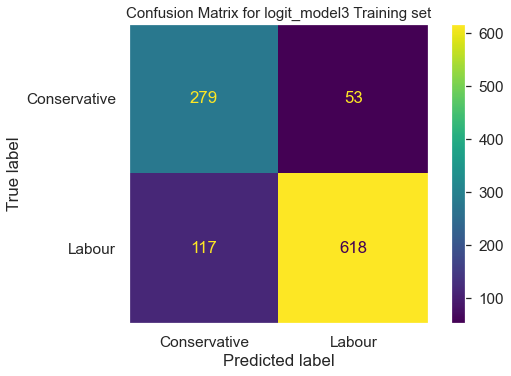

In [436]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for logit_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       130
           1       0.92      0.80      0.86       328

    accuracy                           0.81       458
   macro avg       0.77      0.81      0.78       458
weighted avg       0.83      0.81      0.81       458
 



<Figure size 720x432 with 0 Axes>

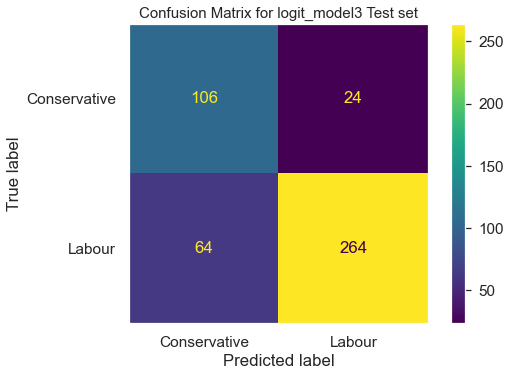

In [437]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for logit_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

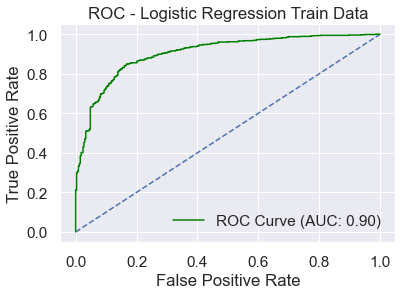

logit_train_auc 0.9047004343906239


In [542]:
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model3, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc3)

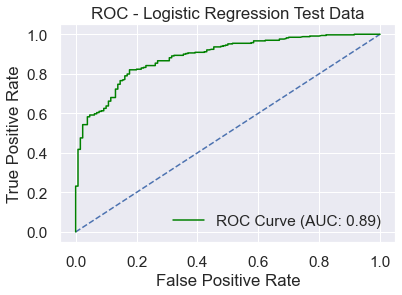

logit_test_auc 0.8864329268292683


In [166]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model3, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc3)

AUC for Training data = 0.9047004343906239
AUC for Test data = 0.8867612570356472


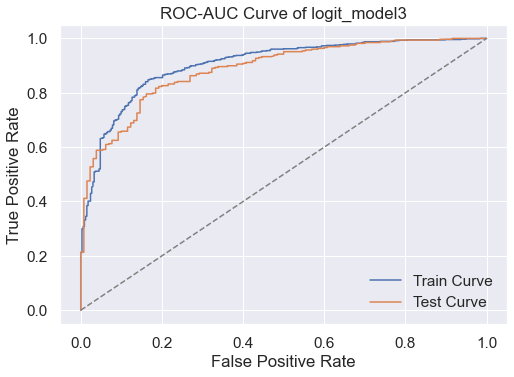

In [438]:
LR_train_predict_prob = logit_model3.predict_proba(X_train)
LR_test_predict_prob = logit_model3.predict_proba(X_test)
LR_pred_train_prob = logit_model3.predict_proba(X_train)
LR_pred_test_prob = logit_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(logit_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(logit_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of logit_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

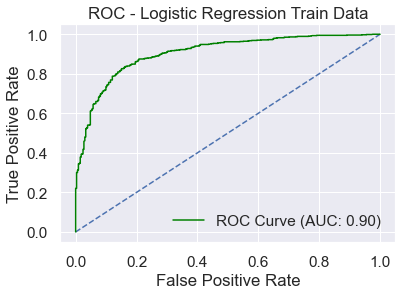

logit_train_auc 0.9047045324153759


In [167]:
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model3, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc3)

### Linear Discriminant Analysis with GridsearchCV

In [153]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [154]:
print("Best Parameters from LDA ",LDA_model3.best_params_)

Best Parameters from LDA  {'solver': 'svd', 'tol': 0.0001}


In [441]:
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [442]:
LDA_train_met3,LDA_train_accu3,LDA_train_precision3,LDA_train_recall3,LDA_train_f13 = performance_matrices(LDA_model3, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu3)
print ('LDA_train_precision ',LDA_train_precision3)
print ('LDA_train_recall ',LDA_train_recall3)
print ('LDA_train_f1 ',LDA_train_f13)

LDA_train_accu  0.85
LDA_train_precision  0.78
LDA_train_recall  0.71
LDA_train_f1  0.74


In [443]:
LDA_train_met3

,precision,recall,f1-score,support
0,0.778146,0.707831,0.741325,332.000000
1,0.873203,0.908844,0.890667,735.000000
accuracy,0.846298,0.846298,0.846298,0.846298
macro avg,0.825674,0.808337,0.815996,1067.000000
weighted avg,0.843625,0.846298,0.844199,1067.000000


In [444]:
LDA_train_met1

,precision,recall,f1-score,support
0,0.778146,0.707831,0.741325,332.000000
1,0.873203,0.908844,0.890667,735.000000
accuracy,0.846298,0.846298,0.846298,0.846298
macro avg,0.825674,0.808337,0.815996,1067.000000
weighted avg,0.843625,0.846298,0.844199,1067.000000


In [445]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.81
LDA_test_precision  0.66
LDA_test_recall  0.68
LDA_test_f1  0.67


In [446]:
LDA_test_met3

,precision,recall,f1-score,support
0,0.661654,0.676923,0.669202,130.000000
1,0.870769,0.862805,0.866769,328.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.766212,0.769864,0.767985,458.000000
weighted avg,0.811413,0.810044,0.810691,458.000000


In [447]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.661654,0.676923,0.669202,130.000000
1,0.870769,0.862805,0.866769,328.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.766212,0.769864,0.767985,458.000000
weighted avg,0.811413,0.810044,0.810691,458.000000


              precision    recall  f1-score   support

           0       0.78      0.71      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.84      1067
 



<Figure size 720x432 with 0 Axes>

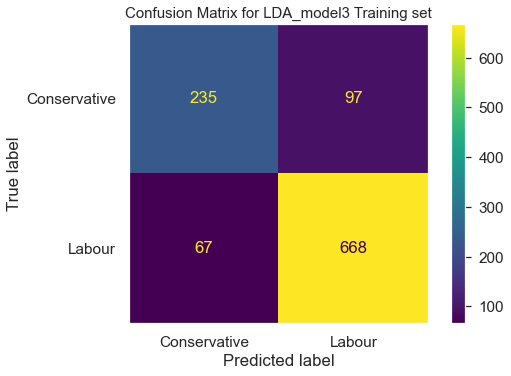

In [448]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for LDA_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       130
           1       0.87      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458
 



<Figure size 720x432 with 0 Axes>

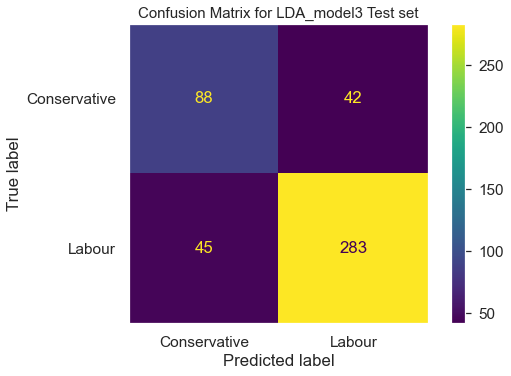

In [449]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for LDA_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

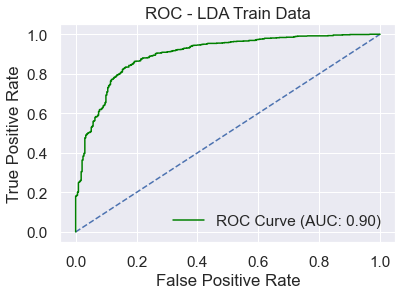

LDA_train_auc 0.8983402999754119


In [170]:
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(LDA_model3, X_train, y_train, 'green', 'ROC - LDA Train Data')
print('LDA_train_auc', logit_train_auc3)

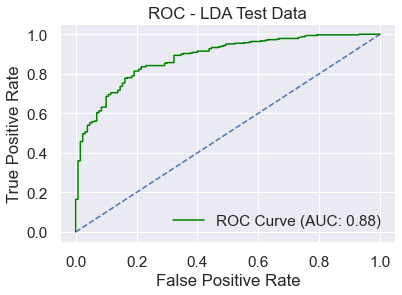

LDA_test_auc 0.8824695121951219


In [172]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(LDA_model3, X_test, y_test, 'green', 'ROC - LDA Test Data')
print('LDA_test_auc', logit_test_auc3)

AUC for Training data = 0.8983402999754119
AUC for Test data = 0.8824695121951219


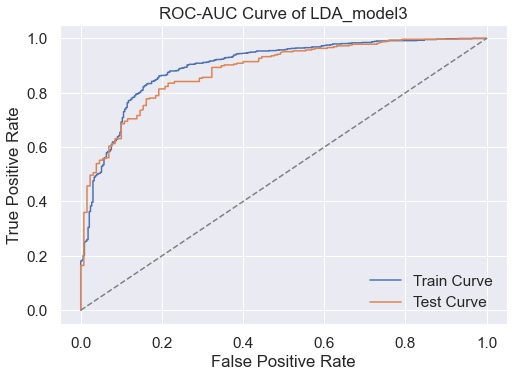

In [450]:
LR_train_predict_prob = LDA_model3.predict_proba(X_train)
LR_test_predict_prob = LDA_model3.predict_proba(X_test)
LR_pred_train_prob = LDA_model3.predict_proba(X_train)
LR_pred_test_prob = LDA_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(LDA_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(LDA_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of LDA_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### KNN Model with GridsearchCV

In [156]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 5)
KNN_model3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

In [160]:
print("Best Parameters from KNN Model",KNN_model3.best_params_)

Best Parameters from KNN Model {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}


In [158]:
ytrain_predict = KNN_model3.predict(X_train)
ytest_predict = KNN_model3.predict(X_test)

In [159]:
KNN_train_met3,KNN_train_accu3,KNN_train_precision3,KNN_train_recall3,KNN_train_f13 = performance_matrices(KNN_model3, X_train, y_train, ytrain_predict)
KNN_train_met_maj3,KNN_train_accu_maj3,KNN_train_precision_maj3,KNN_train_recall_maj3,KNN_train_f1_maj3 = performance_matrices_maj(KNN_model3, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu3) 
print ('KNN_train_precision ',KNN_train_precision3)
print ('KNN_train_recall ',KNN_train_recall3)
print ('KNN_train_f1 ',KNN_train_f13)

KNN_train_accu  0.85
KNN_train_precision  0.79
KNN_train_recall  0.71
KNN_train_f1  0.75


In [455]:
KNN_train_met3

,precision,recall,f1-score,support
0,0.791246,0.707831,0.747218,332.000000
1,0.874026,0.915646,0.894352,735.000000
accuracy,0.850984,0.850984,0.850984,0.850984
macro avg,0.832636,0.811739,0.820785,1067.000000
weighted avg,0.848269,0.850984,0.848571,1067.000000


In [456]:
KNN_train_met1

,precision,recall,f1-score,support
0,0.813115,0.746988,0.778650,332.000000
1,0.889764,0.922449,0.905812,735.000000
accuracy,0.867854,0.867854,0.867854,0.867854
macro avg,0.851439,0.834718,0.842231,1067.000000
weighted avg,0.865914,0.867854,0.866245,1067.000000


In [457]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, X_test, y_test, ytest_predict)
KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.81
KNN_test_precision  0.69
KNN_test_recall  0.6
KNN_test_f1  0.64


In [458]:
KNN_test_met3

,precision,recall,f1-score,support
0,0.690265,0.600000,0.641975,130.000000
1,0.849275,0.893293,0.870728,328.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.769770,0.746646,0.756352,458.000000
weighted avg,0.804142,0.810044,0.805798,458.000000


In [459]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.636364,0.592308,0.613546,130.00000
1,0.842730,0.865854,0.854135,328.00000
accuracy,0.788210,0.788210,0.788210,0.78821
macro avg,0.739547,0.729081,0.733841,458.00000
weighted avg,0.784154,0.788210,0.785846,458.00000


              precision    recall  f1-score   support

           0       0.79      0.71      0.75       332
           1       0.87      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067
 



<Figure size 720x432 with 0 Axes>

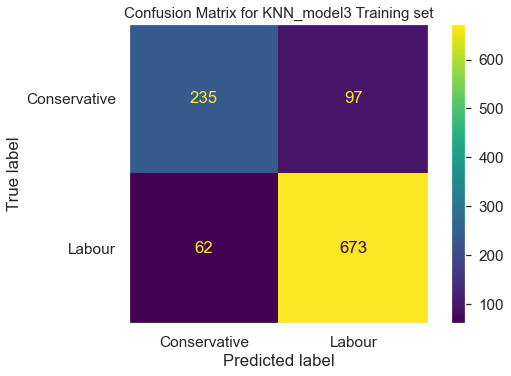

In [460]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for KNN_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       130
           1       0.85      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.81      0.81       458
 



<Figure size 720x432 with 0 Axes>

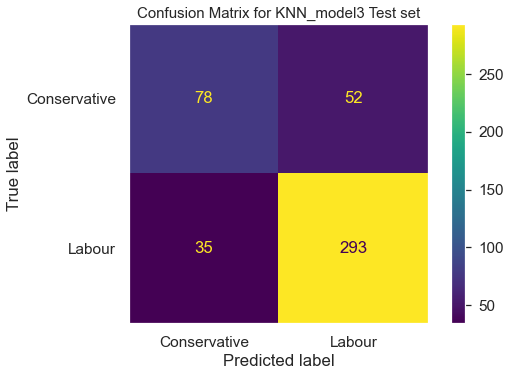

In [461]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for KNN_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

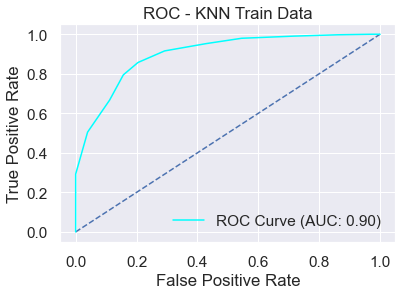

KNN_train_auc 0.899471354806983


In [544]:
KNN_train_auc3, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model3, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc3)

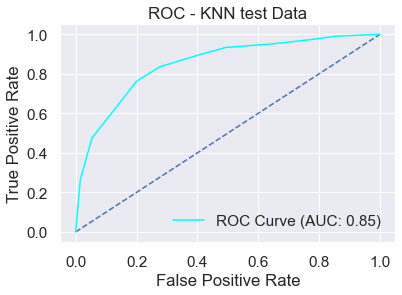

KNN_test_auc 0.85046904315197


In [545]:
KNN_test_auc3, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model3, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc3)

AUC for Training data = 0.899471354806983
AUC for Test data = 0.85046904315197


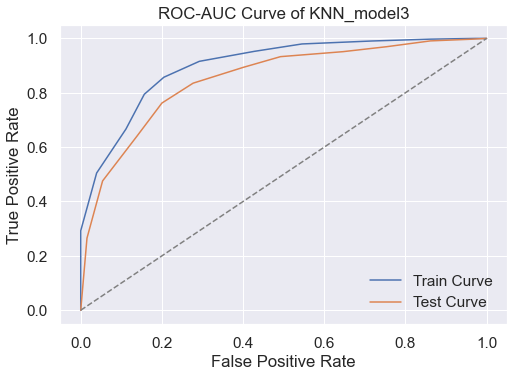

In [462]:
LR_train_predict_prob = KNN_model3.predict_proba(X_train)
LR_test_predict_prob = KNN_model3.predict_proba(X_test)
LR_pred_train_prob = KNN_model3.predict_proba(X_train)
LR_pred_test_prob = KNN_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(KNN_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(KNN_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of KNN_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Support Vector Machine with GridsearchCV

In [162]:
class_weight = dict({0:2.3, 1:1})
clf = svm.SVC(probability=True, class_weight = class_weight)
grid_values = {'C': np.logspace(-1,1,20),  
              'kernel': ['linear']#['linear', 'poly', 'rbf', 'sigmoid']
              } 
SVM_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
SVM_model3.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVC(class_weight={0: 2.3, 1: 1}, probability=True),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'kernel': ['linear']})

In [163]:
print("Best Parameters from SVM Model",SVM_model3.best_params_)

Best Parameters from SVM Model {'C': 0.1, 'kernel': 'linear'}


In [164]:
ytrain_predict = SVM_model3.predict(X_train)
ytest_predict = SVM_model3.predict(X_test)

In [165]:
SVM_train_met3,SVM_train_accu3,SVM_train_precision3,SVM_train_recall3,SVM_train_f13 = performance_matrices(SVM_model3, X_train, y_train, ytrain_predict)
SVM_train_met_maj3,SVM_train_accu_maj3,SVM_train_precision_maj3,SVM_train_recall_maj3,SVM_train_f1_maj3 = performance_matrices_maj(SVM_model3, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu3)
print ('SVM_train_precision ',SVM_train_precision3)
print ('SVM_train_recall ',SVM_train_recall3)
print ('SVM_train_f1 ',SVM_train_f13)

SVM_train_accu  0.83
SVM_train_precision  0.68
SVM_train_recall  0.86
SVM_train_f1  0.76


In [467]:
SVM_train_met3

,precision,recall,f1-score,support
0,0.676960,0.858434,0.756972,332.000000
1,0.927245,0.814966,0.867487,735.000000
accuracy,0.828491,0.828491,0.828491,0.828491
macro avg,0.802102,0.836700,0.812230,1067.000000
weighted avg,0.849368,0.828491,0.833100,1067.000000


In [468]:
SVM_train_met1

,precision,recall,f1-score,support
0,0.877966,0.780120,0.826156,332.000000
1,0.905440,0.951020,0.927671,735.000000
accuracy,0.897844,0.897844,0.897844,0.897844
macro avg,0.891703,0.865570,0.876914,1067.000000
weighted avg,0.896892,0.897844,0.896084,1067.000000


In [469]:
SVM_test_met3,SVM_test_accu3,SVM_test_precision3,SVM_test_recall3,SVM_test_f13 = performance_matrices(SVM_model3, X_test, y_test, ytest_predict)
SVM_test_met_maj3,SVM_test_accu_maj3,SVM_test_precision_maj3,SVM_test_recall_maj3,SVM_test_f1_maj3 = performance_matrices_maj(SVM_model3, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu3)
print ('SVM_test_precision ',SVM_test_precision3)
print ('SVM_test_recall ',SVM_test_recall3)
print ('SVM_test_f1 ',SVM_test_f13)

SVM_test_accu  0.8
SVM_test_precision  0.61
SVM_test_recall  0.82
SVM_test_f1  0.7


In [470]:
SVM_test_met3

,precision,recall,f1-score,support
0,0.609195,0.815385,0.697368,130.000000
1,0.915493,0.792683,0.849673,328.000000
accuracy,0.799127,0.799127,0.799127,0.799127
macro avg,0.762344,0.804034,0.773521,458.000000
weighted avg,0.828553,0.799127,0.806443,458.000000


In [471]:
SVM_test_met1

,precision,recall,f1-score,support
0,0.695652,0.615385,0.653061,130.00000
1,0.854227,0.893293,0.873323,328.00000
accuracy,0.814410,0.814410,0.814410,0.81441
macro avg,0.774940,0.754339,0.763192,458.00000
weighted avg,0.809217,0.814410,0.810804,458.00000


              precision    recall  f1-score   support

           0       0.68      0.86      0.76       332
           1       0.93      0.81      0.87       735

    accuracy                           0.83      1067
   macro avg       0.80      0.84      0.81      1067
weighted avg       0.85      0.83      0.83      1067
 



<Figure size 720x432 with 0 Axes>

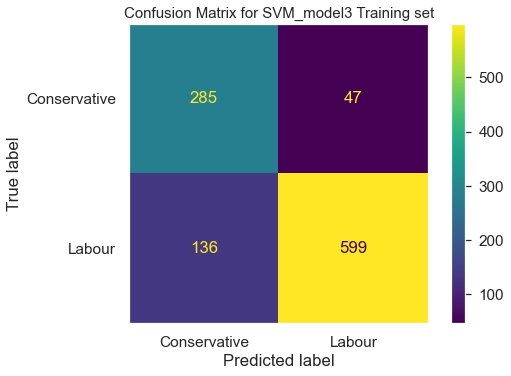

In [472]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for SVM_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.61      0.82      0.70       130
           1       0.92      0.79      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.83      0.80      0.81       458
 



<Figure size 720x432 with 0 Axes>

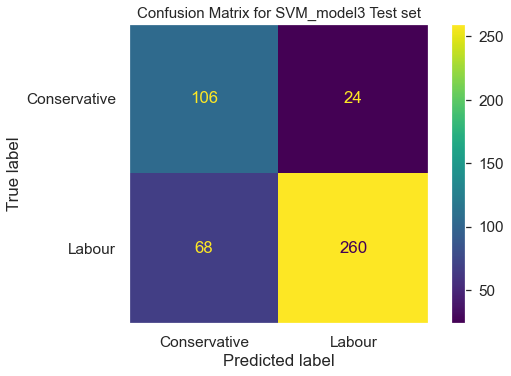

In [473]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for SVM_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

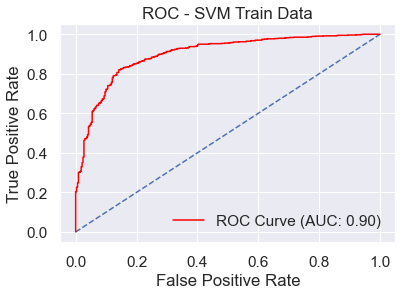

SVM_train_auc 0.9001229407425622


In [546]:
SVM_train_auc3, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_model3, X_train, y_train, 'red', 'ROC - SVM Train Data')
print('SVM_train_auc', SVM_train_auc3)

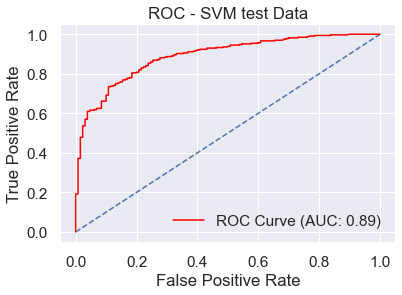

SVM_test_auc 0.8898100375234522


In [547]:
SVM_test_auc3, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model3, X_test, y_test, 'red', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc3)

AUC for Training data = 0.9001229407425622
AUC for Test data = 0.8898100375234522


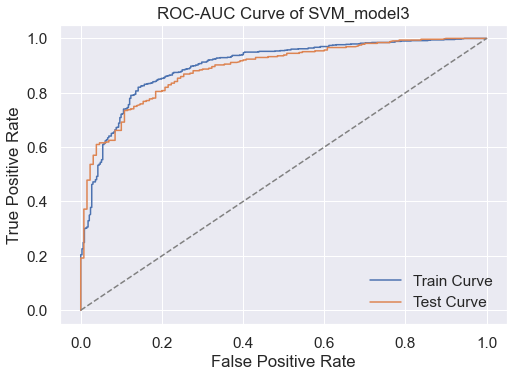

In [474]:
LR_train_predict_prob = SVM_model3.predict_proba(X_train)
LR_test_predict_prob = SVM_model3.predict_proba(X_test)
LR_pred_train_prob = SVM_model3.predict_proba(X_train)
LR_pred_test_prob = SVM_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(SVM_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(SVM_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of SVM_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Bagging using RandomForest

In [596]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:4, 1:1.5})
rfcl = RandomForestClassifier(class_weight=class_weight, 
                              min_samples_leaf=2,
                              min_samples_split=4)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

In [476]:
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [477]:
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
Bagging_met_maj,Bagging_train_accu_maj,Bagging_train_precision_maj,Bagging_train_recall_maj,Bagging_train_f1_maj = performance_matrices_maj(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.88
Bagging_train_precision  0.79
Bagging_train_recall  0.86
Bagging_train_f1  0.82


In [478]:
Bagging_met

,precision,recall,f1-score,support
0,0.789474,0.858434,0.822511,332.000000
1,0.933428,0.896599,0.914643,735.000000
accuracy,0.884724,0.884724,0.884724,0.884724
macro avg,0.861451,0.877516,0.868577,1067.000000
weighted avg,0.888636,0.884724,0.885976,1067.000000


In [479]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
Bagging_met_maj,Bagging_test_accu_maj,Bagging_test_precision_maj,Bagging_test_recall_maj,Bagging_test_f1_maj = performance_matrices_maj(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.82
Bagging_test_precision  0.65
Bagging_test_recall  0.78
Bagging_test_f1  0.71


In [480]:
Bagging_met

,precision,recall,f1-score,support
0,0.651613,0.776923,0.708772,130.000000
1,0.904290,0.835366,0.868463,328.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.777952,0.806144,0.788617,458.000000
weighted avg,0.832570,0.818777,0.823136,458.000000


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       332
           1       0.93      0.90      0.91       735

    accuracy                           0.88      1067
   macro avg       0.86      0.88      0.87      1067
weighted avg       0.89      0.88      0.89      1067
 



<Figure size 720x432 with 0 Axes>

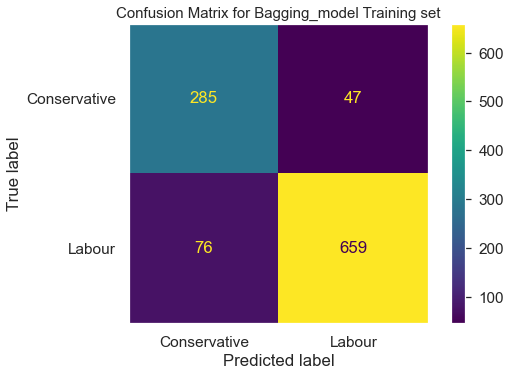

In [481]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(Bagging_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for Bagging_model Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       130
           1       0.90      0.84      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.83      0.82      0.82       458
 



<Figure size 720x432 with 0 Axes>

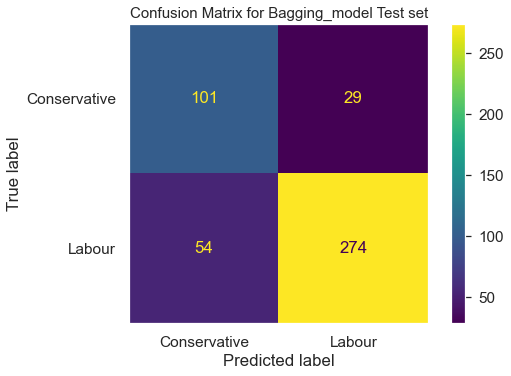

In [482]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(Bagging_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for Bagging_model Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

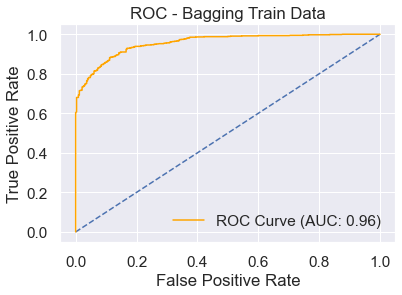

Bagging_train_auc 0.9569543480042619


In [548]:
Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train, y_train, 'orange', 'ROC - Bagging Train Data')
print('Bagging_train_auc', Bagging_train_auc)

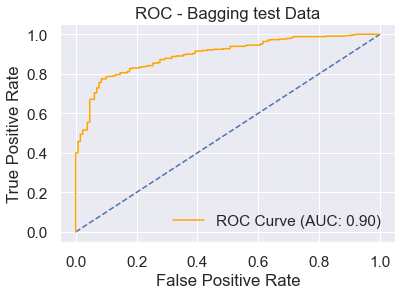

Bagging_test_auc 0.8969394934333959


In [549]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'orange', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

AUC for Training data = 0.9569543480042619
AUC for Test data = 0.8969394934333959


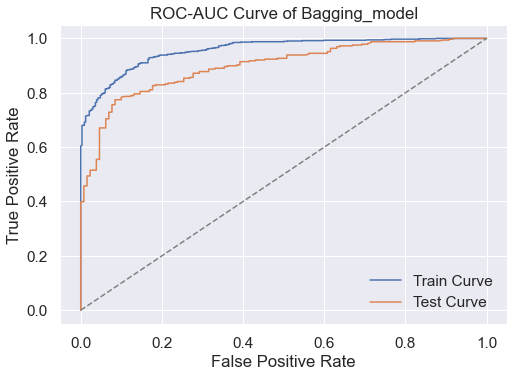

In [483]:
LR_train_predict_prob = Bagging_model.predict_proba(X_train)
LR_test_predict_prob = Bagging_model.predict_proba(X_test)
LR_pred_train_prob = Bagging_model.predict_proba(X_train)
LR_pred_test_prob = Bagging_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of Bagging_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### XGBoost

In [484]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000)
XGB_model.fit(X_train, y_train)

[14:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [485]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [486]:
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
XGB_met_maj,XGB_train_accu_maj,XGB_train_precision_maj,XGB_train_recall_maj,XGB_train_f1_maj = performance_matrices_maj(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.89
XGB_train_precision  0.86
XGB_train_recall  0.77
XGB_train_f1  0.81


In [487]:
XGB_met

,precision,recall,f1-score,support
0,0.861017,0.765060,0.810207,332.000000
1,0.898964,0.944218,0.921035,735.000000
accuracy,0.888472,0.888472,0.888472,0.888472
macro avg,0.879990,0.854639,0.865621,1067.000000
weighted avg,0.887156,0.888472,0.886551,1067.000000


In [488]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
XGB_met_maj,XGB_test_accu_maj,XGB_test_precision_maj,XGB_test_recall_maj,XGB_test_f1_maj = performance_matrices_maj(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.81
XGB_test_precision  0.67
XGB_test_recall  0.67
XGB_test_f1  0.67


In [489]:
XGB_met

,precision,recall,f1-score,support
0,0.674419,0.669231,0.671815,130.00000
1,0.869301,0.871951,0.870624,328.00000
accuracy,0.814410,0.814410,0.814410,0.81441
macro avg,0.771860,0.770591,0.771219,458.00000
weighted avg,0.813985,0.814410,0.814193,458.00000


              precision    recall  f1-score   support

           0       0.86      0.77      0.81       332
           1       0.90      0.94      0.92       735

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



<Figure size 720x432 with 0 Axes>

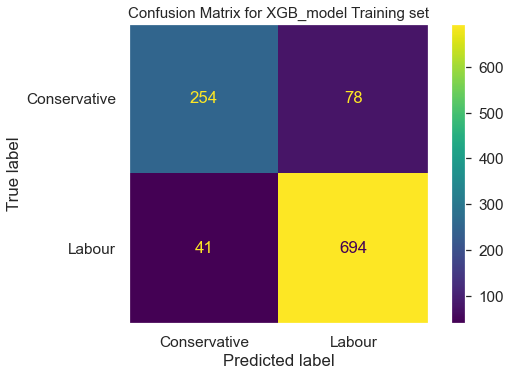

In [490]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(XGB_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for XGB_model Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458
 



<Figure size 720x432 with 0 Axes>

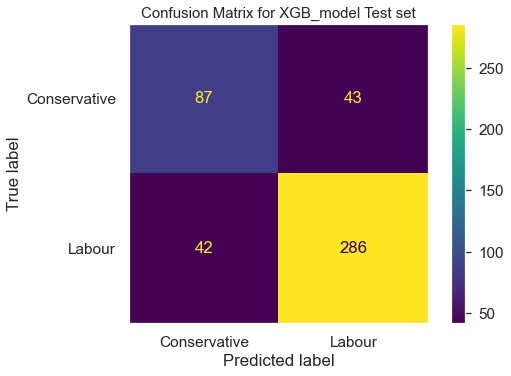

In [491]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(XGB_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for XGB_model Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

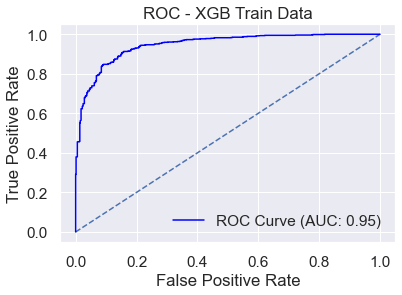

XGB_train_auc 0.9460733953445324


In [550]:
XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train_res, y_train_res, 'blue', 'ROC - XGB Train Data')
print('XGB_train_auc', XGB_train_auc)

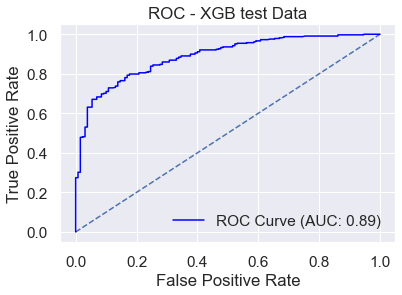

XGB_test_auc 0.8880980300187618


In [551]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'blue', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

AUC for Training data = 0.946053602163757
AUC for Test data = 0.8880980300187618


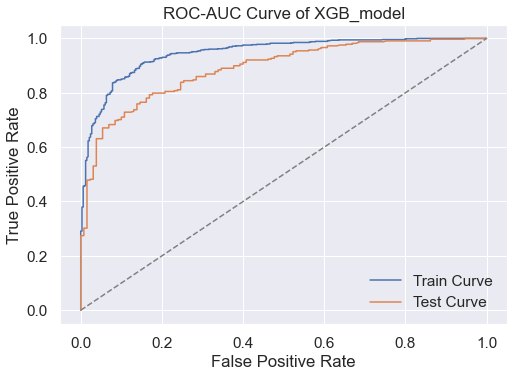

In [492]:
LR_train_predict_prob = XGB_model.predict_proba(X_train)
LR_test_predict_prob = XGB_model.predict_proba(X_test)
LR_pred_train_prob = XGB_model.predict_proba(X_train)
LR_pred_test_prob = XGB_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(XGB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(XGB_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of XGB_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

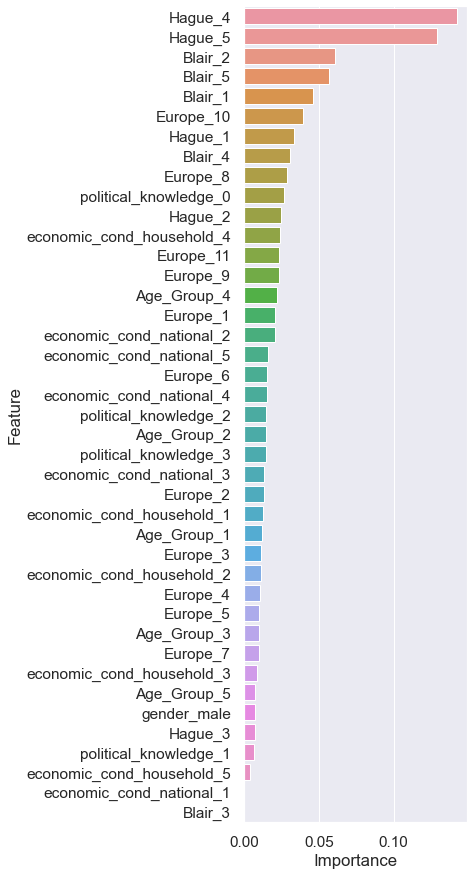

In [493]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : XGB_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,15))
sns.barplot(x='Feature', y='Importance', data=feature_rank)

### Gradient Boosting Classifier

In [494]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [495]:
ytrain_predict = GBC_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [496]:
GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train, y_train, ytrain_predict)
print ('GBC_train_accu ',GBC_train_accu)
print ('GBC_train_precision ',GBC_train_precision)
print ('GBC_train_recall ',GBC_train_recall)
print ('GBC_train_f1 ',GBC_train_f1)

GBC_train_accu  0.99
GBC_train_precision  0.98
GBC_train_recall  0.99
GBC_train_f1  0.99


In [497]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.79
GBC_test_precision  0.62
GBC_test_recall  0.69
GBC_test_f1  0.65


### Cross Validation of all final models

#### Logistic Regression

In [498]:
from sklearn.model_selection import cross_val_score

In [499]:
scores = cross_val_score(logit_model3, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.78504673, 0.78504673, 0.82242991, 0.82242991, 0.82242991,
       0.85046729, 0.8317757 , 0.88679245, 0.82075472, 0.79245283])

In [500]:
logit_train_CVmean = scores.mean()
logit_train_CVstd = scores.std()
print("Logit Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Train Accuracy: 0.82 (+/- 0.03)


In [502]:
scores = cross_val_score(logit_model3, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.7826087 , 0.84782609, 0.7826087 , 0.7826087 , 0.76086957,
       0.82608696, 0.82608696, 0.86956522, 0.84444444, 0.77777778])

In [503]:
logit_test_CVmean = scores.mean()
logit_test_CVstd = scores.std()
print("Logit Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Test Accuracy: 0.81 (+/- 0.04)


#### LDA

In [504]:
scores = cross_val_score(LDA_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.50340136, 0.50340136, 0.50340136, 0.50340136, 0.68027211,
       0.91836735, 0.93197279, 0.91156463, 0.93197279, 0.96598639])

In [505]:
LDA_train_CVmean = scores.mean()
LDA_train_CVstd = scores.std()
print("LDA Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Train Accuracy: 0.74 (+/- 0.20)


In [506]:
scores = cross_val_score(LDA_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.76086957, 0.84782609, 0.84782609, 0.76086957, 0.76086957,
       0.82608696, 0.84782609, 0.89130435, 0.91111111, 0.75555556])

In [507]:
LDA_test_CVmean = scores.mean()
LDA_test_CVstd = scores.std()
print("LDA Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Test Accuracy: 0.82 (+/- 0.06)


#### KNN

In [508]:
scores = cross_val_score(KNN_model3, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.72108844, 0.79591837, 0.78231293, 0.82993197, 0.84353741,
       0.8707483 , 0.91836735, 0.94557823, 0.89115646, 0.85714286])

In [509]:
KNN_train_CVmean = scores.mean()
KNN_train_CVstd = scores.std()
print("KNN Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Train Accuracy: 0.85 (+/- 0.06)


In [510]:
scores = cross_val_score(KNN_model3, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.76086957, 0.80434783, 0.7826087 , 0.76086957, 0.76086957,
       0.7826087 , 0.89130435, 0.84782609, 0.84444444, 0.82222222])

In [511]:
KNN_test_CVmean = scores.mean()
KNN_test_CVstd = scores.std()
print("KNN Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Test Accuracy: 0.81 (+/- 0.04)


#### MNB

In [512]:
scores = cross_val_score(MNB_model, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.80373832, 0.8411215 , 0.80373832, 0.8411215 , 0.82242991,
       0.8317757 , 0.82242991, 0.86792453, 0.83962264, 0.82075472])

In [556]:
MNB_train_CVmean = scores.mean()
MNB_train_CVstd = scores.std()
print("MNB Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Train Accuracy: 0.81 (+/- 0.06)


In [514]:
scores = cross_val_score(MNB_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.7826087 , 0.82608696, 0.82608696, 0.80434783, 0.73913043,
       0.7826087 , 0.84782609, 0.91304348, 0.91111111, 0.82222222])

In [515]:
MNB_test_CVmean = scores.mean()
MNB_test_CVstd = scores.std()
print("MNB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Test Accuracy: 0.83 (+/- 0.05)


### SVM

In [516]:
scores = cross_val_score(SVM_model3, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.80373832, 0.78504673, 0.80373832, 0.80373832, 0.8317757 ,
       0.86915888, 0.81308411, 0.87735849, 0.80188679, 0.77358491])

In [517]:
SVM_train_CVmean = scores.mean()
SVM_train_CVstd = scores.std()
print("SVM Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

SVM Train Accuracy: 0.82 (+/- 0.03)


In [518]:
scores = cross_val_score(SVM_model3, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.80434783, 0.82608696, 0.76086957, 0.7826087 , 0.67391304,
       0.82608696, 0.82608696, 0.82608696, 0.91111111, 0.8       ])

In [519]:
SVM_test_CVmean = scores.mean()
SVM_test_CVstd = scores.std()
print("SVM Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

SVM Test Accuracy: 0.80 (+/- 0.06)


#### Bagging with RF

In [520]:
scores = cross_val_score(Bagging_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.80272109, 0.82312925, 0.84353741, 0.82993197, 0.87755102,
       0.86394558, 0.83673469, 0.9047619 , 0.82312925, 0.81632653])

In [521]:
Bagging_train_CVmean = scores.mean()
Bagging_train_CVstd = scores.std()
print("Bagging Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Train Accuracy: 0.84 (+/- 0.03)


In [522]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.84782609, 0.82608696, 0.82608696, 0.7826087 , 0.80434783,
       0.82608696, 0.86956522, 0.84782609, 0.88888889, 0.84444444])

In [523]:
Bagging_test_CVmean = scores.mean()
Bagging_test_CVstd = scores.std() 
print("Bagging Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Test Accuracy: 0.84 (+/- 0.03)


#### XGBoost

In [524]:
scores = cross_val_score(XGB_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.76190476, 0.78911565, 0.86394558, 0.83673469, 0.85714286,
       0.88435374, 0.8707483 , 0.89115646, 0.88435374, 0.85034014])

In [525]:
XGB_train_CVmean = scores.mean()
XGB_train_CVstd = scores.std() 
print("XGBoost Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

XGBoost Train Accuracy: 0.85 (+/- 0.04)


In [526]:
scores = cross_val_score(XGB_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.76086957, 0.80434783, 0.82608696, 0.76086957, 0.73913043,
       0.73913043, 0.91304348, 0.84782609, 0.88888889, 0.84444444])

In [527]:
XGB_test_CVmean = scores.mean()
XGB_test_CVstd = scores.std() 
print("XGBoost Test Accuracy: %0.2f (+/- %0.2f)" % (XGB_test_CVmean, XGB_test_CVstd))

XGBoost Test Accuracy: 0.81 (+/- 0.06)


### Q 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model 
### Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

#### Final Model Comparison

In [552]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu3,logit_train_auc3,logit_train_recall3,logit_train_recall_maj3,logit_train_precision3,logit_train_precision_maj3,logit_train_f13,logit_train_f1_maj3],
                     'LDA Train':[LDA_train_accu,LDA_train_auc1,LDA_train_recall,LDA_train_recall_maj,LDA_train_precision,LDA_train_precision_maj,LDA_train_f1,LDA_train_f1_maj],
                     'KNN Train':[KNN_train_accu3,KNN_train_auc3,KNN_train_recall3,KNN_train_recall_maj3,KNN_train_precision3,KNN_train_precision_maj3,KNN_train_f13,KNN_train_f1_maj3],
                     'MNB Train':[MNB_train_accu,MNB_train_auc1,MNB_train_recall,MNB_train_recall_maj,MNB_train_precision,MNB_train_precision_maj,MNB_train_f1,MNB_train_f1_maj],
                     'SVM Train':[SVM_train_accu3,SVM_train_auc3,SVM_train_recall3,SVM_train_recall_maj3,SVM_train_precision3,SVM_train_precision_maj3,SVM_train_f13,SVM_train_f1_maj3],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_recall_maj,Bagging_train_precision,Bagging_train_precision_maj,Bagging_train_f1,Bagging_train_f1_maj],
                     'XGB Train':[XGB_train_accu,XGB_train_auc,XGB_train_recall,XGB_train_recall_maj,XGB_train_precision,XGB_train_precision_maj,XGB_train_f1,XGB_train_f1_maj],
                     },index=index)
round(train_perf_data,2)

,Logit Train,LDA Train,KNN Train,MNB Train,SVM Train,Bagging Train,XGB Train
Accuracy,0.84,0.85,0.85,0.84,0.83,0.88,0.89
AUC,0.90,0.90,0.90,0.90,0.90,0.96,0.95
Recall-0,0.84,0.71,0.71,0.73,0.86,0.86,0.77
Recall-1,0.84,0.91,0.92,0.88,0.81,0.90,0.94
Precision-0,0.70,0.78,0.79,0.74,0.68,0.79,0.86
Precision-1,0.92,0.87,0.87,0.88,0.93,0.93,0.90
F1 Score-0,0.77,0.74,0.75,0.73,0.76,0.82,0.81
F1 Score-1,0.88,0.89,0.89,0.88,0.87,0.91,0.92


In [553]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
test_perf_data = pd.DataFrame({'Logit Test':[logit_test_accu3,logit_test_auc3,logit_test_recall3,logit_test_recall_maj3,logit_test_precision3,logit_test_precision_maj3,logit_test_f13,logit_test_f1_maj3],
                     'LDA Test':[LDA_test_accu,LDA_test_auc1,LDA_test_recall,LDA_test_recall_maj,LDA_test_precision,LDA_test_precision_maj,LDA_test_f1,LDA_test_f1_maj],
                     'KNN Test':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_recall_maj3,KNN_test_precision3,KNN_test_precision_maj3,KNN_test_f13,KNN_test_f1_maj3],
                     'MNB Test':[MNB_test_accu,MNB_test_auc1,MNB_test_recall,MNB_test_recall_maj,MNB_test_precision,MNB_test_precision_maj,MNB_test_f1,MNB_test_f1_maj],
                     'SVM Test':[SVM_test_accu3,SVM_test_auc3,SVM_test_recall3,SVM_test_recall_maj3,SVM_test_precision3,SVM_test_precision_maj3,SVM_test_f13,SVM_test_f1_maj3],
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_recall_maj,Bagging_test_precision,Bagging_test_precision_maj,Bagging_test_f1,Bagging_test_f1_maj],
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_recall_maj,XGB_test_precision,XGB_test_precision_maj,XGB_test_f1,XGB_test_f1_maj]
                    },index=index)
round(test_perf_data,2)

,Logit Test,LDA Test,KNN Test,MNB Test,SVM Test,Bagging Test,XGB Test
Accuracy,0.81,0.81,0.81,0.83,0.80,0.82,0.81
AUC,0.89,0.88,0.85,0.89,0.89,0.90,0.89
Recall-0,0.82,0.68,0.60,0.74,0.82,0.78,0.67
Recall-1,0.80,0.86,0.89,0.86,0.79,0.84,0.87
Precision-0,0.62,0.66,0.69,0.68,0.61,0.65,0.67
Precision-1,0.92,0.87,0.85,0.89,0.92,0.90,0.87
F1 Score-0,0.71,0.67,0.64,0.71,0.70,0.71,0.67
F1 Score-1,0.86,0.87,0.87,0.88,0.85,0.87,0.87


In [557]:
index=['CV Mean Accuracy','CV Std Deviation']
CV_data = pd.DataFrame({'Logit Train':[logit_train_CVmean,logit_train_CVstd],
                     'Logit Test':[logit_test_CVmean,logit_test_CVstd],
                     'LDA Train':[LDA_train_CVmean,LDA_train_CVstd],
                     'LDA Test':[LDA_test_CVmean,LDA_test_CVstd],
                     'KNN Train':[KNN_train_CVmean,KNN_train_CVstd],
                     'KNN Test':[KNN_test_CVmean,KNN_test_CVstd],
                     'MNB Train':[MNB_train_CVmean,MNB_train_CVstd],
                     'MNB Test':[MNB_test_CVmean,MNB_test_CVstd],
                     'SVM Train':[SVM_train_CVmean,SVM_train_CVstd],
                     'SVM Test':[SVM_test_CVmean,SVM_test_CVstd],
                     'Bagging Train':[Bagging_train_CVmean,Bagging_train_CVstd],
                     'Bagging Test':[Bagging_test_CVmean,Bagging_test_CVstd],
                     'XGB Train':[XGB_train_CVmean,XGB_train_CVstd],
                     'XGB Test':[XGB_test_CVmean,XGB_test_CVstd]
                    },index=index)
round(CV_data,2)


,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,MNB Train,MNB Test,SVM Train,SVM Test,Bagging Train,Bagging Test,XGB Train,XGB Test
CV Mean Accuracy,0.82,0.81,0.74,0.82,0.85,0.81,0.81,0.83,0.82,0.80,0.84,0.84,0.85,0.81
CV Std Deviation,0.03,0.04,0.20,0.06,0.06,0.04,0.06,0.05,0.03,0.06,0.03,0.03,0.04,0.06


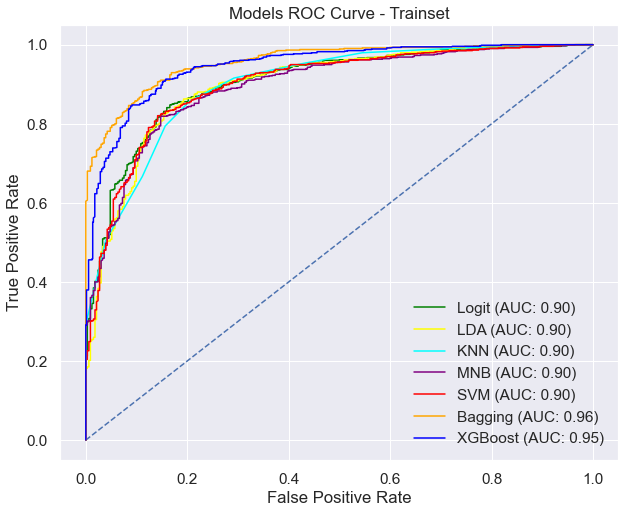

In [587]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_train_auc3)
plt.plot(LDA_train_fpr,LDA_train_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_train_auc1)
plt.plot(KNN_train_fpr,KNN_train_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_train_auc3)
plt.plot(MNB_train_fpr,MNB_train_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_train_auc1)
plt.plot(SVM_train_fpr,SVM_train_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_train_auc3)
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_train_auc)
plt.plot(XGB_train_fpr,XGB_train_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve - Trainset')
plt.legend(loc="lower right")

In [563]:
from matplotlib.patches import Rectangle

Text(0.5, 1.0, 'Models Performances on Train Datasets')

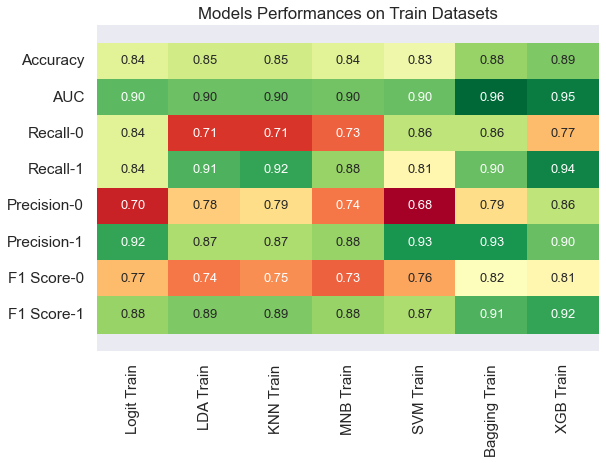

In [595]:
plt.subplots(figsize=(9,6))
ax = sns.heatmap(train_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=15)
plt.title('Models Performances on Train Datasets')

Text(0.5, 1.0, 'Model Performance in Test Datasets')

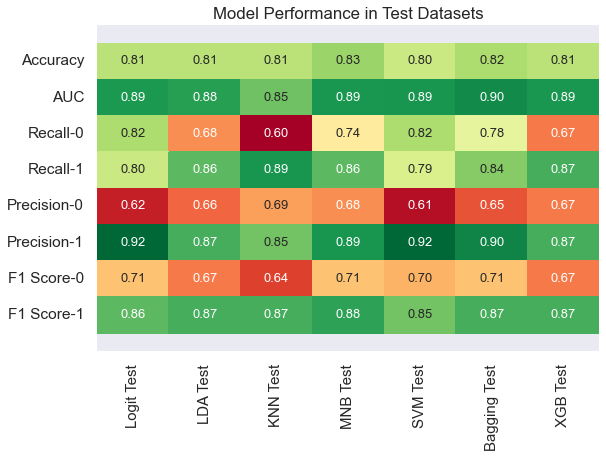

In [594]:
plt.subplots(figsize=(9,6))
ax = sns.heatmap(test_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=15)
plt.title('Model Performance in Test Datasets')

Text(0.5, 1.0, 'Cross Validation Scores - Train & Test')

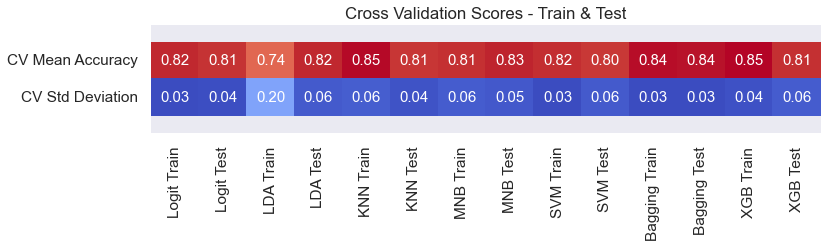

In [584]:
plt.subplots(figsize=(12,2))
ax = sns.heatmap(CV_data, cmap='coolwarm', annot=True, fmt='.2f',annot_kws={"fontsize":15}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Cross Validation Scores - Train & Test')

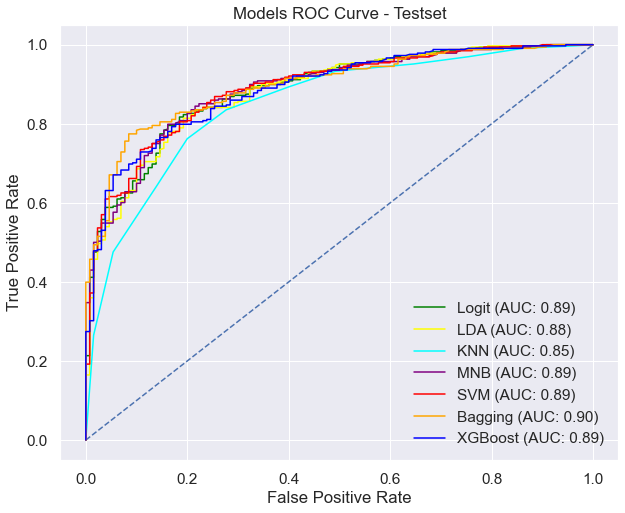

In [592]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_test_auc3)
plt.plot(LDA_test_fpr,LDA_test_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_test_auc1)
plt.plot(KNN_test_fpr,KNN_test_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_test_auc3)
plt.plot(MNB_test_fpr,MNB_test_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_test_auc1)
plt.plot(SVM_test_fpr,SVM_test_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_test_auc3)
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_test_auc)
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve - Testset')
plt.legend(loc="lower right");